<div class="alert alert-block alert-info">
    As 1st step of this Data Science Mid term i've included a visualization of the data i'll be applying regression model
    on it with a linear trendlines
</div>

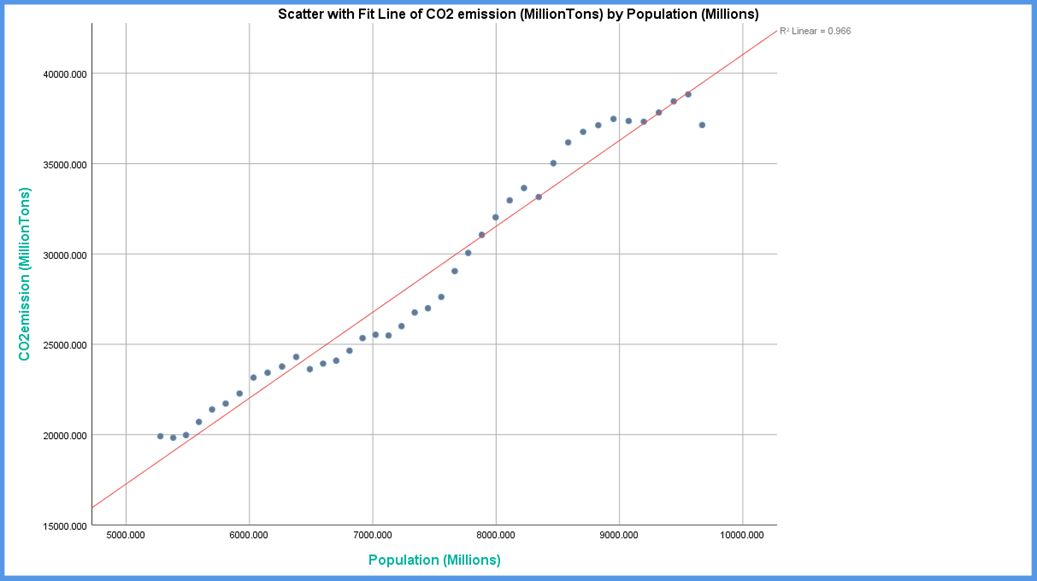

In [1]:
#Import the library to display image
from IPython.display import Image
#Display the image iwth specific size
Image(filename="./Midterm/regressionCheck.jpeg",  width = 800, height = 550)

<h2>1. Introduction</h2>

<h3>Domain Specifications:</h3>
    
Co2 Emssion over the last few years increasing at a vast rate and contrbuting to climate change, deforestation, bad air quality and ocean acidifciation. We will try to split the data occasionally to between the years 1980-2000 and 2000-2020 to get a greater understanding of the co2 emission rate during these both periods.
Through this project i will try to develop an understanding of how co2 emission is increasing day by day in each country. We can track countries with most co2 emission in order for them to take appropriate measures e.g they can see the countries with less CO2 emission and find out the steps for them to reduce their CO2 emission.

We will also find out how the population is affecting the CO2 emission. How CO2 emssion has increased over last few years in proportion to the CO2 emission. So e.g if they are propotional increasing one way to reduce CO2 emissions is by encouraging population control. 

We will also try to figure out the CO2 emission growth rate per year, we can do it country wise or the overall CO2 emission rate(increase or dercrease) per year. This will alow us to figure out the rate at which CO2 emission is produced.

We will try to visualize the temperature change due to CO2 emission over the years 1980-2020. We can find out does CO2 emission impact on temperature, if so how? what impact has it made so far? what potentially it can do.

The object is to make the world realise that how co2 emission is increasing day by day and to make the world realise to take specific measure to reduce it.
The machine learning will come in place by applying supervised learning technique called linear regression. it will help to determine the relation between population and co2 emission. As population is increasing co2 emission isincreasing. We will try to predict how when population increases will affect the co2 emission.

<h3>Data Set Details:</h3> 

The dataset i've chose is very closely realated to the domain i've chosen. Its name is "Our World in Data CO2 and Greenhouse Gas Emissions dataset" which i got from https://ourworldindata.org/co2-emissions. A download button from this site redirected me to their github repository at https://github.com/owid/co2-data from where i downloaded the dataset. Also it is mentioned their that the dataset was combined by taking data from third-party authors and they are mentioned where due. Before using the data the license of these third-party authors(for the dataset) also needs to be checked.

<b>Authors</b></br>
The main gatherer and recorder of this dataset are:

<ul>
    <li>Hannah Ritchie</li>
    <li>Max Roser</li>
    <li>Edouard Mathieu</li>
    <li>Bobbie Macdonald</li>
    <li>Pablo Rosado</li>   
</ul>

The dataset includes more than 79 columns but for our project 6 will be selected which include:
<ul>
    <li>country: The country name of the record</li>
    <li>year: The Year of the record</li>
    <li>population: The population of each the country</li>
    <li>co2: CO2 Emission of the country measured in million tonnes</li>
    <li>co2_growth_prct: The percentage growth of CO2 of the country</li>
    <li>temperature_change_from_co2: Temperacture change from CO2 impact of the country</li>   
</ul>

The dataset is in a csv format which was downloaded and stored in a folder locally. It was first avaialble on the date 2020-08-07. Since then it has been constantly updated with the most recent updat coming out on 2023-05-04. It has a file size of 13.5 MB. It has around 50598 rows which will be reduced as we will pre-process the data.

<b>Citation</b></br>
This dataset requires citation which we have taken from their website https://ourworldindata.org/co2-emissions:
Hannah Ritchie, Max Roser and Pablo Rosado (2020) - "CO₂ and Greenhouse Gas Emissions". Published online at OurWorldInData.org. Retrieved from: 'https://ourworldindata.org/co2-and-greenhouse-gas-emissions' [Online Resource]

The dataset will be splitted occationaly between years 1980-2000 and 2000-2020 to get a better understanding of CO2 emissions during this periods. Other tahn that, it will also occasionally drop the country column and will sum up the CO2 Emission, temperature change from CO2 and the CO2 growth percent for each year. This way it will allow us te get a better understanding of overall world CO2 emissions per year. This will also be used for Machine Learning to know how population and CO2 Emissions are proportional and also to predict them.

<H2>2. Implementation</H2>

<h3>Pre processing</h3>

<div class="alert alert-block alert-info">
First we will import the CO2 emission dataset from the local storage and display first 5 rows to see how the dataset looks like.
</div>

In [2]:
#The code in cells below is written by me

In [3]:
# Importing the relelvant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Reading the dataset which is stored locally and storing it in a DataFrame
initialDataset = pd.read_csv(r'./Midterm/owid-co2-data.csv')

#To get the overview of the dataset by checking first 5 records
initialDataset.head()

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1850,AFG,3752993.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1851,AFG,3769828.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.165,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,Afghanistan,1852,AFG,3787706.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.164,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
3,Afghanistan,1853,AFG,3806634.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.164,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
4,Afghanistan,1854,AFG,3825655.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.163,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


<div class="alert alert-block alert-info">
    Since we can see there are alot ao columns and we only need some specific for our project we will select our
    desired columns and save data in a new dataframe.  
    We also need to filter the dataset to only have records which are from year greater than 1980. 
    Lastly, we have to reset the index to 0 as currently index 0 starts from records with year 1850 but we want index
    0 to be on the first record where year is greater than 1980. And as record goes the index is incremented by 1.
    We will again output first 5 rows to see the results
</div>


In [4]:
#list of columns that we want to select
columnsToBeKept = ['country', 'year', 'population', 'co2', 'co2_growth_prct', 'temperature_change_from_co2']

#selecting the desired columns and storing them in a new dataframe
ColumnSelectedDataset = initialDataset[columnsToBeKept].copy()

In [5]:
#Filter To dataset in order to get records that are between year 1980 and 2021
filteredDataset = ColumnSelectedDataset[(ColumnSelectedDataset['year'] > 1980) & (ColumnSelectedDataset['year'] < 2021)]

#reset the index to 0.
filteredDataset = filteredDataset.reset_index(drop=True)

#Getting overview of data by checking first 5 records
filteredDataset.head(5)

,country,year,population,co2,co2_growth_prct,temperature_change_from_co2
0,Afghanistan,1981,11155196.0,1.978,12.649,0.0
1,Afghanistan,1982,10088290.0,2.095,5.869,0.0
2,Afghanistan,1983,9951447.0,2.520,20.308,0.0
3,Afghanistan,1984,10243689.0,2.822,11.968,0.0
4,Afghanistan,1985,10512220.0,3.501,24.096,0.0


<div class="alert alert-block alert-success">
As we can see in the above output only the desired columns are presented. The records are starting from year greater than 1980 and the index is starting from 0.
</div>

<div class="alert alert-block alert-info">
     Next we will get details of the dataset
</div>

In [6]:
#Outputting the details of the dataset
filteredDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   country                      10841 non-null  object 
 1   year                         10841 non-null  int64  
 2   population                   9631 non-null   float64
 3   co2                          9801 non-null   float64
 4   co2_growth_prct              9363 non-null   float64
 5   temperature_change_from_co2  9760 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 508.3+ KB


<div class="alert alert-block alert-success">
    The details of dataset are successfuly displayed. The filtered dataset has 10840 records with 6 columns. 
</div>

<div class="alert alert-block alert-info">
    Next we'll be looking for any missing values in our dataset
</div>

In [7]:
#Tracking if there are missing values
filteredDataset.isna().sum()

country                           0
year                              0
population                     1210
co2                            1040
co2_growth_prct                1478
temperature_change_from_co2    1081
dtype: int64

<div class="alert alert-block alert-info">
    The output above shows there are many null values in population, co2, co2_growth_prct, temperature_change_from_co2
    columns. Now we will drop the records with null values. We will again check if the dataset still contains any null 
    values
</div>

In [8]:
#Delete rows with missing values in specificed columns. 
filteredDataset = filteredDataset.dropna(subset=['population','co2','temperature_change_from_co2',
                                                             'co2_growth_prct'])
#resetting the index so keep the dataset consistent since some rows are deleted
filteredDataset = filteredDataset.reset_index(drop=True)

#Tracking if there are missing values
filteredDataset.isna().sum()

country                        0
year                           0
population                     0
co2                            0
co2_growth_prct                0
temperature_change_from_co2    0
dtype: int64

<div class="alert alert-block alert-success">
    Null values are succesfuly removed
</div>

<div class="alert alert-block alert-info">
    Next column names will be changed to give a better understanding of what they represent and also to have first 
    letter capitalized
</div>

In [9]:
#Renaming the columns
filteredDataset.rename(columns = {'country':'Country', 'population': 'Population', 'year':'Year', 
                                  'co2':'CO2 emission (Million Tons)', 'co2_growth_prct' : 'CO2 % Growth',
                                  'temperature_change_from_co2' : 'Temp_Change_from_CO2'}, inplace = True)

In [10]:
#Print the details about the filtered dataset
filteredDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8861 entries, 0 to 8860
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      8861 non-null   object 
 1   Year                         8861 non-null   int64  
 2   Population                   8861 non-null   float64
 3   CO2 emission (Million Tons)  8861 non-null   float64
 4   CO2 % Growth                 8861 non-null   float64
 5   Temp_Change_from_CO2         8861 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 415.5+ KB


<div class="alert alert-block alert-success">
    We can see out dataset now has records decreased from 10840 to 8861 since records with null values were 
    deleted.And since we reset the index it is consistent with total rows.
</div>

<div class="alert alert-block alert-info">
    The above output also show the dtypes of the columns. The 'country' column has dtype of object which is not 
    recommended and since there will be same countries to have multiple rows and there are fixed number of 
    countries(new country can still be added)
    it would be better to change its Dtype from object to category. 
</div>

In [11]:
filteredDataset['Country'] = filteredDataset['Country'].astype('category')

# To display full result in efficient manner converting Country column to a series.
allCountries = filteredDataset['Country'].astype(str)

# Outputting the unique values from allCountries series
print(allCountries.unique())

['Afghanistan' 'Africa' 'Albania' 'Algeria' 'Andorra' 'Angola' 'Anguilla'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Asia' 'Australia'
 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados'
 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan' 'Bolivia'
 'Bonaire Sint Eustatius and Saba' 'Bosnia and Herzegovina' 'Botswana'
 'Brazil' 'British Virgin Islands' 'Brunei' 'Bulgaria' 'Burkina Faso'
 'Burundi' 'Cambodia' 'Cameroon' 'Canada' 'Cape Verde'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'Congo' 'Cook Islands' 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba'
 'Curacao' 'Cyprus' 'Czechia' 'Democratic Republic of Congo' 'Denmark'
 'Djibouti' 'Dominica' 'Dominican Republic' 'Ecuador' 'Egypt'
 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini'
 'Ethiopia' 'Europe' 'European Union (27)' 'Faeroe Islands' 'Fiji'
 'Finland' 'France' 'French Polynesia' 'Gabon' 'Gambia' 'Georgia'
 'Germany' 'Ghana' 'Greece' 'Greenland' 'Grenada'

<div class="alert alert-block alert-info">
    We notice that this series contains not only countries but also has regions in it e.g 'Asia', which are not related to the countries column. We found that after manually going through each item of the series and now we will remove the records of the data set with these in the country column 
</div>

In [12]:
# deleting records from dataset that has some specific data in the country column
indexAge = filteredDataset[(filteredDataset['Country'] == 'European Union (27)') |
                                 (filteredDataset['Country'] == 'Upper-middle-income countries') |
                                 (filteredDataset['Country'] == 'Low-income countries') | 
                                 (filteredDataset['Country'] == 'High-income countries') | 
                                 (filteredDataset['Country'] == 'Asia') | 
                                 (filteredDataset['Country'] == 'World') |
                                 (filteredDataset['Country'] == 'North America') |
                                 (filteredDataset['Country'] == 'Europe') | 
                                 (filteredDataset['Country'] == 'Lower-middle-income countries') ].index

filteredDataset.drop(indexAge , inplace=True)

<div class="alert alert-block alert-info">
    The values in the Population columns are too big and we need to shorten then just like it was already done on the
    CO2 Emission (Million Tons)
</div>

In [13]:
#Renaming the columns
filteredDataset.rename(columns = {'Population': 'Population (Millions)'}, inplace = True)                                 

In [14]:
#code i have written without assistance ends here.

In [15]:
#Population values converted to millions and then rounded off
filteredDataset['Population (Millions)'] = filteredDataset['Population (Millions)'] / 1000000
filteredDataset['Population (Millions)'] = np.round_(filteredDataset['Population (Millions)'], decimals = 3)

#Get 5 random samples of our dataset
filteredDataset.sample(5)

,Country,Year,Population (Millions),CO2 emission (Million Tons),CO2 % Growth,Temp_Change_from_CO2
6313,Peru,2020,33.305,47.489,-17.668,0.003
403,Aruba,2004,0.094,2.616,2.146,0.000
4809,Malaysia,1991,18.017,65.785,21.220,0.003
2371,Ecuador,2012,15.484,37.409,0.028,0.002
3099,Ghana,1993,16.644,4.310,17.690,0.001


<div class="alert alert-block alert-success">
    We seem to have complete our objective. Now we can print out the dataset info again.
</div>

In [16]:
filteredDataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8501 entries, 0 to 8860
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   Country                      8501 non-null   category
 1   Year                         8501 non-null   int64   
 2   Population (Millions)        8501 non-null   float64 
 3   CO2 emission (Million Tons)  8501 non-null   float64 
 4   CO2 % Growth                 8501 non-null   float64 
 5   Temp_Change_from_CO2         8501 non-null   float64 
dtypes: category(1), float64(4), int64(1)
memory usage: 425.0 KB


<div class="alert alert-block alert-info">
One last thing before preprocessing thing is to create a separate dataset. Earlier the dataset displayed record for each country for every year. This new dataset will display 1 record for each year and the other column will have all the data sum up. For example for Year 1996, the dataset will have the total population for that year in the column
'Population (Millions)'.Summing up values for each year will be done for other columns (CO2 emission (Million Tons),
CO2 % Growth, Temp_Change_from_CO2. Country column will be dropped.This dataset will be used for visualization and also for displaying visualizations.
</div>    

In [17]:
annualCo2Data = filteredDataset.groupby('Year', as_index=False).agg({'Population (Millions)': 'sum', 
                                                           'CO2 emission (Million Tons)': 'sum',
                                                           'CO2 % Growth': 'sum',
                                                           'Temp_Change_from_CO2': 'sum'
                                                          })

# Random 5 samples of new dataset
annualCo2Data.sample(5)

,Year,Population (Millions),CO2 emission (Million Tons),CO2 % Growth,Temp_Change_from_CO2
35,2016,9196.794,37320.406,640.299,1.172
26,2007,8109.588,32966.160,953.875,0.994
38,2019,9557.278,38833.616,482.321,1.230
14,1995,6810.985,24645.004,1258.552,0.791
21,2002,7554.747,27619.519,728.587,0.900


<div class="alert alert-block alert-success">
    The output above shows we are done with the pre-processing of data for now
<div/>

### Statistical Summary of the Dataset

<div class="alert alert-block alert-info">
    Next we will get the statistics of our data
</div>

In [18]:
#the code in cells below written by me

In [19]:
#Get statistics of the filteredDataset dataset
filteredDataset.describe()

,Year,Population (Millions),CO2 emission (Million Tons),CO2 % Growth,Temp_Change_from_CO2
count,8501.000000,8501.000000,8501.000000,8501.000000,8501.000000
mean,2000.764969,34.937434,135.504806,3.638535,0.004218
std,11.486946,133.582318,602.159932,26.035727,0.015830
min,1981.000000,0.002000,0.000000,-100.000000,0.000000
25%,1991.000000,0.761000,0.809000,-2.356000,0.000000
50%,2001.000000,5.532000,7.262000,1.857000,0.001000
75%,2011.000000,19.490000,54.694000,7.197000,0.002000
max,2020.000000,1424.930000,10956.213000,1203.570000,0.230000


In [20]:
#Get statistics of the filteredDataset dataset
annualCo2Data.describe()

,Year,Population (Millions),CO2 emission (Million Tons),CO2 % Growth,Temp_Change_from_CO2
count,40.000000,40.000000,40.000000,40.000000,40.000000
mean,2000.500000,7425.078250,28798.158850,773.279550,0.896350
std,11.690452,1310.275026,6335.505588,589.417408,0.196517
min,1981.000000,5277.293000,19828.825000,-1119.735000,0.598000
25%,1990.750000,6349.925000,23731.865750,469.661500,0.729750
50%,2000.500000,7392.957000,26877.755000,773.607500,0.880500
75%,2010.250000,8493.851250,35309.932000,1139.476750,1.056750
max,2020.000000,9670.107000,38833.616000,2326.191000,1.248000


In [21]:
#Getting Statistics of specific database columns
filteredDataset[['Country']].describe() 

,Country
count,8501
unique,217
top,Afghanistan
freq,40


<div class="alert alert-block alert-info">
Now we will get the measure of central tendency for both of the datasets and visualize it. Measures of central tendency includes Mean, Median, Mode, Quantiles. We'll be using line plots for visualization. Quantiles will be find out and printed but will be visualized in next sub-section using box-plot
</div>

<h4>Measures of Central tendency</h4>

In [22]:
#Getting the mode of Country
countryMode = filteredDataset['Country'].mode()
countryCount = countryMode.value_counts()
print(countryMode)

0      Afghanistan
1           Africa
2          Albania
3          Algeria
4           Angola
          ...     
197      Venezuela
198        Vietnam
199          Yemen
200         Zambia
201       Zimbabwe
Name: Country, Length: 202, dtype: category
Categories (226, object): ['Afghanistan', 'Africa', 'Albania', 'Algeria', ..., 'World', 'Yemen', 'Zambia', 'Zimbabwe']


<div class="alert alert-block alert-info">
The mode seems to be a tie between the countries since there are many that have appeared the same(highest).
To check it even further we will visualize it but since there are many countries we will only visualize top 10 so the
visualizaiotn is clear.    
</div>

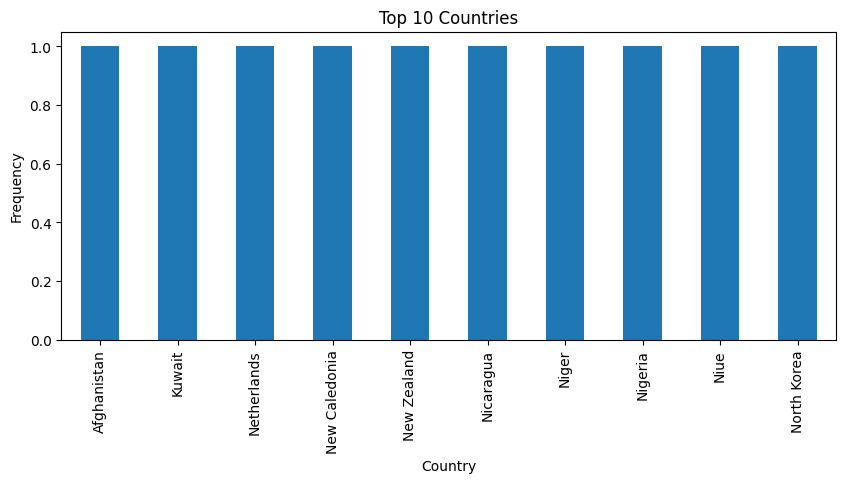

In [23]:
plt.figure(figsize=(10, 4))
#creating a bar chart for top 10  countries (mode wise)
countryCount.head(10).plot(kind='bar')
#set the label on the x-axis
plt.xlabel('Country')
#set the label on the y-axis
plt.ylabel('Frequency')
#set the title of the figure
plt.title('Top 10 Countries')
#display the figure
plt.show()


<div class="alert alert-block alert-info">
Visualization further supports that there is a tie between mode since there are too many that have appeard same times
</div>

<div class="alert alert-block alert-info">
Next we will find the the central tendency of both the dataset.  <br/>Centeral tendency for filteredDataset will be find out first.
</div>

In [24]:
#Get the Mean
populationMean = filteredDataset['Population (Millions)'].mean()
#Get the Median
populationMedian = filteredDataset['Population (Millions)'].median()
#Get the Mode
populationMode = filteredDataset['Population (Millions)'].mode()

#Get the Upper Quantile
upperQuantilePopulation = filteredDataset['Population (Millions)'].quantile(0.75)
#Get the Lower Quantile
lowerQuantilePopulation = filteredDataset['Population (Millions)'].quantile(0.25)
#Get the Inter Quantile
interQuantilePopulation = upperQuantilePopulation - lowerQuantilePopulation 

#Get the Mean
co2Mean = filteredDataset['CO2 emission (Million Tons)'].mean()
#Get the Median
co2Median = filteredDataset['CO2 emission (Million Tons)'].median()
#Get the Mode
co2Mode = filteredDataset['CO2 emission (Million Tons)'].mode()

#Get the Upper Quantile
upperQuantileCo2 = filteredDataset['CO2 emission (Million Tons)'].quantile(0.75)
#Get the Lower Quantile
lowerQuantileCo2 = filteredDataset['CO2 emission (Million Tons)'].quantile(0.25)
#Get the Inter Quantile
interQuantileCo2 = upperQuantileCo2 - lowerQuantileCo2 

#Get the Mean
co2PercentageGrowthMean = filteredDataset['CO2 % Growth'].mean()
#Get the Median
co2PercentageGrowthMedian = filteredDataset['CO2 % Growth'].median()
#Get the Mode
co2PercentageGrowthMode = filteredDataset['CO2 % Growth'].mode()

#Get the Upper Quantile
upperQuantileCo2PercentageGrowth = filteredDataset['CO2 % Growth'].quantile(0.75)
#Get the Lower Quantile
lowerQuantileCo2PercentageGrowth = filteredDataset['CO2 % Growth'].quantile(0.25)
#Get the Inter Quantile
interQuantileCo2PercentageGrowth = upperQuantileCo2PercentageGrowth - lowerQuantileCo2PercentageGrowth 

#Get the Mean
tempChangeMean = filteredDataset['Temp_Change_from_CO2'].mean()
#Get the Median
tempChangeMedian = filteredDataset['Temp_Change_from_CO2'].median()
#Get the Mode
tempChangeMode = filteredDataset['Temp_Change_from_CO2'].mode()

#Get the Upper Quantile
upperQuantileTempChange = filteredDataset['Temp_Change_from_CO2'].quantile(0.75)
#Get the Lower Quantile
lowerQuantileTempChange = filteredDataset['Temp_Change_from_CO2'].quantile(0.25)
#Get the Inter Quantile
interQuantileTempChange = upperQuantileTempChange - lowerQuantileTempChange 


#Print all the central tendency values that were found out
print(
    "Population (Millions) Mean: ", populationMean, 
    "\nPopulation (Millions) Median: ", populationMedian,
    "\nPopulation (Millions) Mode: ", populationMode,
    "\nPopulation (Millions) Upper Quantile: ", upperQuantilePopulation,
    "\nPopulation (Millions) Lower Quantile: ", lowerQuantilePopulation,
    "\nPopulation (Millions) Inter Quantile: ", interQuantilePopulation,
    "\n\nCO2 Emission(Million Tons) Mean: ", co2Mean,
    "\nCO2 Emission(Million Tons) Median: ", co2Median,
    "\nCO2 Emission(Million Tons) Mode: ", co2Mode,
    "\nCO2 Emission(Million Tons) Upper Quantile: ", upperQuantileCo2,
    "\nCO2 Emission(Million Tons) Lower Quantile: ", lowerQuantileCo2,
    "\nCO2 Emission(Million Tons) Inter Quantile: ", interQuantileCo2,
    "\n\nCO2 % Growth Mean: ", co2PercentageGrowthMean,
    "\nCO2 % Growth Median: ", co2PercentageGrowthMedian,
    "\nCO2 % Growth Mode: ", co2PercentageGrowthMode,
    "\nCO2 % Growth Upper Quantile: ", upperQuantileCo2PercentageGrowth,
    "\nCO2 % Growth Lower Quantile: ", lowerQuantileCo2PercentageGrowth,
    "\nCO2 % Growth Inter Quantile: ", interQuantileCo2PercentageGrowth,
    "\n\nTemp Change Mean: ", tempChangeMean,
    "\nTemp Change Median: ", tempChangeMedian,
    "\nTemp Change Mode: ", tempChangeMode,
    "\nTemp Change Upper Quantile: ", upperQuantileTempChange,
    "\nTemp Change Lower Quantile: ", lowerQuantileTempChange,
    "\nTemp Change Inter Quantile: ", interQuantileTempChange
)

Population (Millions) Mean:  34.937434419480056 
Population (Millions) Median:  5.532 
Population (Millions) Mode:  0    0.006
Name: Population (Millions), dtype: float64 
Population (Millions) Upper Quantile:  19.49 
Population (Millions) Lower Quantile:  0.761 
Population (Millions) Inter Quantile:  18.729 

CO2 Emission(Million Tons) Mean:  135.50480578755443 
CO2 Emission(Million Tons) Median:  7.262 
CO2 Emission(Million Tons) Mode:  0    0.066
Name: CO2 emission (Million Tons), dtype: float64 
CO2 Emission(Million Tons) Upper Quantile:  54.694 
CO2 Emission(Million Tons) Lower Quantile:  0.809 
CO2 Emission(Million Tons) Inter Quantile:  53.885000000000005 

CO2 % Growth Mean:  3.638534525349959 
CO2 % Growth Median:  1.857 
CO2 % Growth Mode:  0    0.0
Name: CO2 % Growth, dtype: float64 
CO2 % Growth Upper Quantile:  7.197 
CO2 % Growth Lower Quantile:  -2.356 
CO2 % Growth Inter Quantile:  9.553 

Temp Change Mean:  0.004217621456299259 
Temp Change Median:  0.001 
Temp Change 

Now we will visualize the central tendency for the filteredDataset. Note: Quantiles will be visualized in next subsection.

In [25]:
#code i have written without assistance ends here

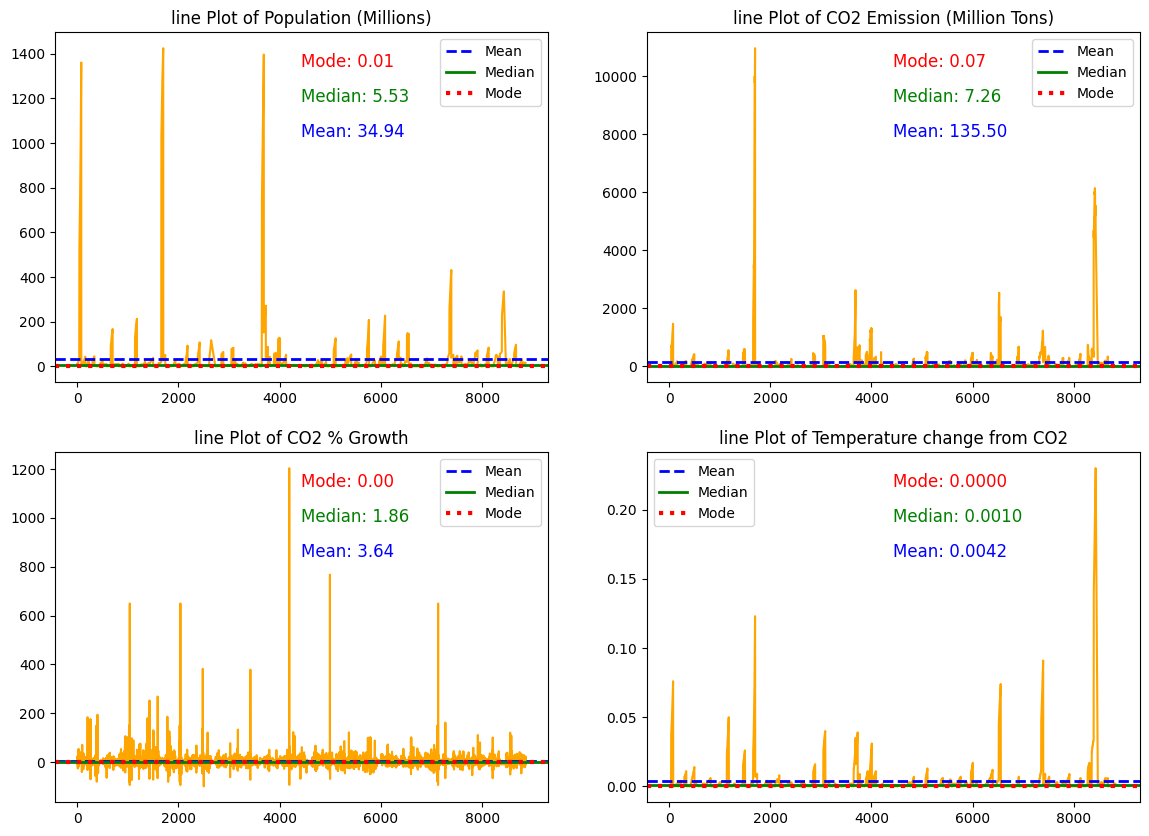

In [26]:
#Create a grid with 2 x 2 Grid for subplots
fig, ax = plt.subplots(2,2,figsize=(14,10))

#Create the line plot
ax[0,0].plot(filteredDataset['Population (Millions)'], color = 'orange')
# display line for mean in graph
ax[0,0].axhline(populationMean, color='blue', linestyle='dashed', label='Mean', lw=2)
# display line for median in graph
ax[0,0].axhline(populationMedian, color='green', linestyle='solid', label='Median', lw=2)
#display line for mode in graph
ax[0,0].axhline(populationMode[0], color='red', linestyle='dotted', label='Mode', lw=3)
#display mean value in graph
ax[0,0].text(0.5, 0.7, f'Mean: {populationMean:.2f}', color='blue', fontsize = 12 ,transform=ax[0,0].transAxes)
#display median value in graph
ax[0,0].text(0.5, 0.8, f'Median: {populationMedian:.2f}', color='green', fontsize = 12 ,transform=ax[0,0].transAxes)
#display mode value in graph
ax[0,0].text(0.5, 0.9, f'Mode: {populationMode[0]:.2f}', color='red', fontsize = 12 ,transform=ax[0,0].transAxes)
#Set the title of the subplot
ax[0,0].set_title('line Plot of Population (Millions)')
#add legend to help understand the labels
ax[0,0].legend()

#Create the line plot
ax[0,1].plot(filteredDataset['CO2 emission (Million Tons)'], color = 'orange')
# display line for mean in graph
ax[0,1].axhline(co2Mean, color='blue', linestyle='dashed', label='Mean', lw=2)
# display line for median in graph
ax[0,1].axhline(co2Median, color='green', linestyle='solid', label='Median', lw=2)
#display line for mode in graph
ax[0,1].axhline(co2Mode[0], color='red', linestyle='dotted', label='Mode', lw=3)
#display mean value in graph
ax[0,1].text(0.5, 0.7, f'Mean: {co2Mean:.2f}', color='blue', fontsize = 12 ,transform=ax[0,1].transAxes)
#display median value in graph
ax[0,1].text(0.5, 0.8, f'Median: {co2Median:.2f}', color='green', fontsize = 12 ,transform=ax[0,1].transAxes)
#display mode value in graph
ax[0,1].text(0.5, 0.9, f'Mode: {co2Mode[0]:.2f}', color='red', fontsize = 12 ,transform=ax[0,1].transAxes)
#Set the title of the subplot
ax[0,1].set_title('line Plot of CO2 Emission (Million Tons)')
#add legend to help understand the labels
ax[0,1].legend()

#Create the line plot
ax[1,0].plot(filteredDataset['CO2 % Growth'], color = 'orange')
# display line for mean in graph
ax[1,0].axhline(co2PercentageGrowthMean, color='blue', linestyle='dashed', label='Mean', lw=2)
# display line for median in graph
ax[1,0].axhline(co2PercentageGrowthMedian, color='green', linestyle='solid', label='Median', lw=2)
#display line for mode in graph
ax[1,0].axhline(co2PercentageGrowthMode[0], color='red', linestyle='dotted', label='Mode', lw=3)
#display mean value in graph
ax[1,0].text(0.5, 0.7, f'Mean: {co2PercentageGrowthMean:.2f}', color='blue', fontsize = 12 ,transform=ax[1,0].transAxes)
#display median value in graph
ax[1,0].text(0.5, 0.8, f'Median: {co2PercentageGrowthMedian:.2f}', color='green', fontsize = 12 ,transform=ax[1,0].transAxes)
#display mode value in graph
ax[1,0].text(0.5, 0.9, f'Mode: {co2PercentageGrowthMode[0]:.2f}', color='red', fontsize = 12 ,transform=ax[1,0].transAxes)
#Set the title of the subplot
ax[1,0].set_title('line Plot of CO2 % Growth')
#add legend to help understand the labels
ax[1,0].legend()

#Create the line plot
ax[1,1].plot(filteredDataset['Temp_Change_from_CO2'], color = 'orange')
# display line for mean in graph
ax[1,1].axhline(tempChangeMean, color='blue', linestyle='dashed', label='Mean', lw=2)
# display line for median in graph
ax[1,1].axhline(tempChangeMedian, color='green', linestyle='solid', label='Median', lw=2)
#display line for mode in graph
ax[1,1].axhline(tempChangeMode[0], color='red', linestyle='dotted', label='Mode', lw=3)
#display mean value in graph
ax[1,1].text(0.5, 0.7, f'Mean: {tempChangeMean:.4f}', color='blue', fontsize = 12 ,transform=ax[1,1].transAxes)
#display medain value in graph
ax[1,1].text(0.5, 0.8, f'Median: {tempChangeMedian:.4f}', color='green', fontsize = 12 ,transform=ax[1,1].transAxes)
#display mode value in graph
ax[1,1].text(0.5, 0.9, f'Mode: {tempChangeMode[0]:.4f}', color='red', fontsize = 12 ,transform=ax[1,1].transAxes)
#Set the title of the subplot
ax[1,1].set_title('line Plot of Temperature change from CO2')
#add legend to help understand the labels
ax[1,1].legend()

#Display the figure
plt.show()

<div class="alert alert-block alert-success">
The mean,medain and mode values for each column of filtered dataset is shown by line on the graph, and also by displaying the value as text on graph
</div>

<div class="alert alert-block alert-info">
    Next we do the same for annualCo2Data dataset 
</div>

In [27]:
#the code in below cell is written by me

In [28]:
#Get the Mean
populationMean = annualCo2Data['Population (Millions)'].mean()
#Get the Median
populationMedian = annualCo2Data['Population (Millions)'].median()
#Get the Mode
populationMode = annualCo2Data['Population (Millions)'].mode()

#Get the Upper Quantile
upperQuantilePopulation = annualCo2Data['Population (Millions)'].quantile(0.75)
#Get the Lower Quantile
lowerQuantilePopulation = annualCo2Data['Population (Millions)'].quantile(0.25)
#Get the Inter Quantile
interQuantilePopulation = upperQuantilePopulation - lowerQuantilePopulation 

#Get the Mean
co2Mean = annualCo2Data['CO2 emission (Million Tons)'].mean()
#Get the Median
co2Median = annualCo2Data['CO2 emission (Million Tons)'].median()
#Get the Mode
co2Mode = annualCo2Data['CO2 emission (Million Tons)'].mode()

#Get the Upper Quantile
upperQuantileCo2 = annualCo2Data['CO2 emission (Million Tons)'].quantile(0.75)
#Get the Lower Quantile
lowerQuantileCo2 = annualCo2Data['CO2 emission (Million Tons)'].quantile(0.25)
#Get the Inter Quantile
interQuantileCo2 = upperQuantileCo2 - lowerQuantileCo2 


#Get the Mean
co2PercentageGrowthMean = annualCo2Data['CO2 % Growth'].mean()
#Get the Median
co2PercentageGrowthMedian = annualCo2Data['CO2 % Growth'].median()
#Get the Mode
co2PercentageGrowthMode = annualCo2Data['CO2 % Growth'].mode()

#Get the Upper Quantile
upperQuantileCo2PercentageGrowth = annualCo2Data['CO2 % Growth'].quantile(0.75)
#Get the Lower Quantile
lowerQuantileCo2PercentageGrowth = annualCo2Data['CO2 % Growth'].quantile(0.25)
#Get the Inter Quantile
interQuantileCo2PercentageGrowth = upperQuantileCo2PercentageGrowth - lowerQuantileCo2PercentageGrowth 

#Get the Mean
tempChangeMean = annualCo2Data['Temp_Change_from_CO2'].mean()
#Get the Median
tempChangeMedian = annualCo2Data['Temp_Change_from_CO2'].median()
#Get the Mode
tempChangeMode = annualCo2Data['Temp_Change_from_CO2'].mode()

#Get the Upper Quantile
upperQuantileTempChange = annualCo2Data['Temp_Change_from_CO2'].quantile(0.75)
#Get the Lower Quantile
lowerQuantileTempChange = annualCo2Data['Temp_Change_from_CO2'].quantile(0.25)
#Get the Inter Quantile
interQuantileTempChange = upperQuantileTempChange - lowerQuantileTempChange 

#Print all the central tendency values that were found out
print(
    "Central Tendency for Annual Co2 Data",
    "\n\nPopulation (Millions) Mean: ", populationMean, 
    "\nPopulation (Millions) Median: ", populationMedian,
    "\nPopulation (Millions) Upper Quantile: ", upperQuantilePopulation,
    "\nPopulation (Millions) Lower Quantile: ", lowerQuantilePopulation,
    "\nPopulation (Millions) Inter Quantile: ", interQuantilePopulation,
    "\n\nCO2 Emission(Million Tons) Mean: ", co2Mean,
    "\nCO2 Emission(Million Tons) Median: ", co2Median,
    "\nCO2 Emission(Million Tons) Upper Quantile: ", upperQuantileCo2,
    "\nCO2 Emission(Million Tons) Lower Quantile: ", lowerQuantileCo2,
    "\nCO2 Emission(Million Tons) Inter Quantile: ", interQuantileCo2,
    "\n\nCO2 % Growth Mean: ", co2PercentageGrowthMean,
    "\nCO2 % Growth Median: ", co2PercentageGrowthMedian,
    "\nCO2 % Growth Upper Quantile: ", upperQuantileCo2PercentageGrowth,
    "\nCO2 % Growth Lower Quantile: ", lowerQuantileCo2PercentageGrowth,
    "\nCO2 % Growth Inter Quantile: ", interQuantileCo2PercentageGrowth,
    "\n\nTemp Change Mean: ", tempChangeMean,
    "\nTemp Change Median: ", tempChangeMedian,
    "\nTemp Change Upper Quantile: ", upperQuantileTempChange,
    "\nTemp Change Lower Quantile: ", lowerQuantileTempChange,
    "\nTemp Change Inter Quantile: ", interQuantileTempChange
)

Central Tendency for Annual Co2 Data 

Population (Millions) Mean:  7425.0782500000005 
Population (Millions) Median:  7392.957 
Population (Millions) Upper Quantile:  8493.85125 
Population (Millions) Lower Quantile:  6349.925 
Population (Millions) Inter Quantile:  2143.9262499999995 

CO2 Emission(Million Tons) Mean:  28798.15885 
CO2 Emission(Million Tons) Median:  26877.755 
CO2 Emission(Million Tons) Upper Quantile:  35309.932 
CO2 Emission(Million Tons) Lower Quantile:  23731.86575 
CO2 Emission(Million Tons) Inter Quantile:  11578.06625 

CO2 % Growth Mean:  773.27955 
CO2 % Growth Median:  773.6075000000001 
CO2 % Growth Upper Quantile:  1139.47675 
CO2 % Growth Lower Quantile:  469.66150000000005 
CO2 % Growth Inter Quantile:  669.81525 

Temp Change Mean:  0.89635 
Temp Change Median:  0.8805000000000001 
Temp Change Upper Quantile:  1.05675 
Temp Change Lower Quantile:  0.72975 
Temp Change Inter Quantile:  0.32700000000000007


<div class="alert alert-block alert-success">
The mean,medain and mode values for each column of annualCo2Data dataset is shown by line on the graph, and also by displaying the value as text on graph.
</div>

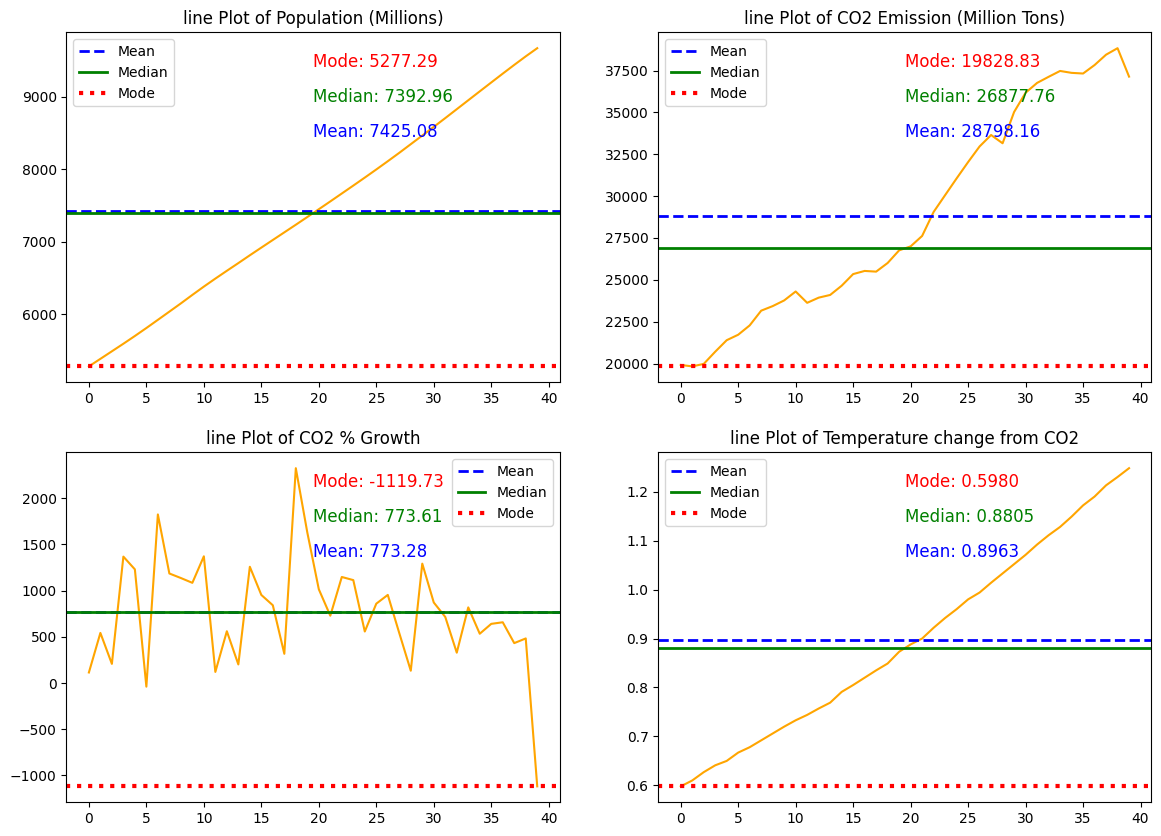

In [29]:
#Create a grid with 2 x 2 Grid for subplots
fig, ax = plt.subplots(2,2,figsize=(14,10))

#Create the line plot
ax[0,0].plot(annualCo2Data['Population (Millions)'], color = 'orange')
# display line for mean in graph
ax[0,0].axhline(populationMean, color='blue', linestyle='dashed', label='Mean', lw=2)
# display line for median in graph
ax[0,0].axhline(populationMedian, color='green', linestyle='solid', label='Median', lw=2)
# display line for mode in graph
ax[0,0].axhline(populationMode[0], color='red', linestyle='dotted', label='Mode', lw=3)
#display mean value in graph
ax[0,0].text(0.5, 0.7, f'Mean: {populationMean:.2f}', color='blue', fontsize = 12 ,transform=ax[0,0].transAxes)
#display median value in graph
ax[0,0].text(0.5, 0.8, f'Median: {populationMedian:.2f}', color='green', fontsize = 12 ,transform=ax[0,0].transAxes)
#display mode value in graph
ax[0,0].text(0.5, 0.9, f'Mode: {populationMode[0]:.2f}', color='red', fontsize = 12 ,transform=ax[0,0].transAxes)
#Set the title of the subplot
ax[0,0].set_title('line Plot of Population (Millions)')
#add legend to help understand the labels
ax[0,0].legend()

#Create the line plot
ax[0,1].plot(annualCo2Data['CO2 emission (Million Tons)'], color = 'orange')
# display line for mean in graph
ax[0,1].axhline(co2Mean, color='blue', linestyle='dashed', label='Mean', lw=2)
# display line for median in graph
ax[0,1].axhline(co2Median, color='green', linestyle='solid', label='Median', lw=2)
# display line for mode in graph
ax[0,1].axhline(co2Mode[0], color='red', linestyle='dotted', label='Mode', lw=3)
#display mean value in graph
ax[0,1].text(0.5, 0.7, f'Mean: {co2Mean:.2f}', color='blue', fontsize = 12 ,transform=ax[0,1].transAxes)
#display median value in graph
ax[0,1].text(0.5, 0.8, f'Median: {co2Median:.2f}', color='green', fontsize = 12 ,transform=ax[0,1].transAxes)
#display mode value in graph
ax[0,1].text(0.5, 0.9, f'Mode: {co2Mode[0]:.2f}', color='red', fontsize = 12 ,transform=ax[0,1].transAxes)
#Set the title of the subplot
ax[0,1].set_title('line Plot of CO2 Emission (Million Tons)')
#add legend to help understand the labels
ax[0,1].legend()

#Create the line plot
ax[1,0].plot(annualCo2Data['CO2 % Growth'], color = 'orange')
# display line for mean in graph
ax[1,0].axhline(co2PercentageGrowthMean, color='blue', linestyle='dashed', label='Mean', lw=2)
# display line for median in graph
ax[1,0].axhline(co2PercentageGrowthMedian, color='green', linestyle='solid', label='Median', lw=2)
# display line for mode in graph
ax[1,0].axhline(co2PercentageGrowthMode[0], color='red', linestyle='dotted', label='Mode', lw=3)
#display mean value in graph
ax[1,0].text(0.5, 0.7, f'Mean: {co2PercentageGrowthMean:.2f}', color='blue', fontsize = 12 ,transform=ax[1,0].transAxes)
#display median value in graph
ax[1,0].text(0.5, 0.8, f'Median: {co2PercentageGrowthMedian:.2f}', color='green', fontsize = 12 ,transform=ax[1,0].transAxes)
#display mode value in graph
ax[1,0].text(0.5, 0.9, f'Mode: {co2PercentageGrowthMode[0]:.2f}', color='red', fontsize = 12 ,transform=ax[1,0].transAxes)
#Set the title of the subplot
ax[1,0].set_title('line Plot of CO2 % Growth')
#add legend to help understand the labels
ax[1,0].legend()

#Create the line plot
ax[1,1].plot(annualCo2Data['Temp_Change_from_CO2'], color = 'orange')
# display line for mean in graph
ax[1,1].axhline(tempChangeMean, color='blue', linestyle='dashed', label='Mean', lw=2)
# display line for median in graph
ax[1,1].axhline(tempChangeMedian, color='green', linestyle='solid', label='Median', lw=2)
# display line for mode in graph
ax[1,1].axhline(tempChangeMode[0], color='red', linestyle='dotted', label='Mode', lw=3)
#display mean value in graph
ax[1,1].text(0.5, 0.7, f'Mean: {tempChangeMean:.4f}', color='blue', fontsize = 12 ,transform=ax[1,1].transAxes)
#display median value in graph
ax[1,1].text(0.5, 0.8, f'Median: {tempChangeMedian:.4f}', color='green', fontsize = 12 ,transform=ax[1,1].transAxes)
#display mode value in graph
ax[1,1].text(0.5, 0.9, f'Mode: {tempChangeMode[0]:.4f}', color='red', fontsize = 12 ,transform=ax[1,1].transAxes)
#Set the title of the subplot
ax[1,1].set_title('line Plot of Temperature change from CO2')
#add legend to help understand the labels
ax[1,1].legend()

#Dislay the figure
plt.show()

<div class="alert alert-block alert-success">
The mean,medain and mode values for each column of annualCo2Data dataset is shown by line on the graph, and also by displaying the value as text on graph
</div>

<h4>Measures of Spread</h4>

<div class="alert alert-block alert-info">
In this subsection we will find measure of spread including variance, standard deviation, range for both the data sets. Theses will be displayed using a box plot and the qunatiles will be displayed as text with the measure of spread values
</div>

<div class="alert alert-block alert-success">
    Measure of spread for filteredDataset
</div>

In [30]:
#Get the variance
populationVariance = filteredDataset['Population (Millions)'].var()
#Get the standard deviation
populationStd = filteredDataset['Population (Millions)'].std()
# Get the range of values in the column
populationRange = filteredDataset['Population (Millions)'].max() - filteredDataset['Population (Millions)'].min()

#Get the variance
co2Variance = filteredDataset['CO2 emission (Million Tons)'].var()
#Get the standard deviation
co2Std = filteredDataset['CO2 emission (Million Tons)'].std()
# Get the range of values in the column
co2Range = filteredDataset['CO2 emission (Million Tons)'].max() - filteredDataset['CO2 emission (Million Tons)'].min()

#Get the variance
co2PercentageGrowthVariance = filteredDataset['CO2 % Growth'].var()
#Get the standard deviation
co2PercentageGrowthStd = filteredDataset['CO2 % Growth'].std()
# Get the range of values in the column
co2PercentageGrowthRange = filteredDataset['CO2 % Growth'].max() - filteredDataset['CO2 % Growth'].min()

#Get the variance
tempChangeVariance = filteredDataset['Temp_Change_from_CO2'].var()
#Get the standard deviation
tempChangeStd = filteredDataset['Temp_Change_from_CO2'].std()
# Get the range of values in the column
tempChangeRange = filteredDataset['Temp_Change_from_CO2'].max() - filteredDataset['Temp_Change_from_CO2'].min()


#Print all the values for measure of spread
print("Measures of Spread of Filtered DataSet"
      "\n\nVariance of Population: ", populationVariance,
      "\nStandard Deviation of Population: ", populationStd,
      "\nRange of Population: ", populationRange,
      "\n\nVariance of CO2 Emission: ", co2Variance,
      "\nStandard Deviation of CO2 Emission: ", co2Std,
      "\nRange of CO2 Emission: ", co2Range,
      "\n\nVariance of CO2 % Growth: ", co2PercentageGrowthVariance,
      "\nStandard Deviation of CO2 % Growth: ", co2PercentageGrowthStd,
      "\nRange of CO2 % Growth: ", co2PercentageGrowthRange,
      "\n\nVariance of Temp Change: ", tempChangeVariance,
      "\nStandard Deviation of Temp Change: ", tempChangeStd,
      "\nRange of Temp Change: ", tempChangeRange
      
      
     )

Measures of Spread of Filtered DataSet

Variance of Population:  17844.23555806832 
Standard Deviation of Population:  133.582317535175 
Range of Population:  1424.928 

Variance of CO2 Emission:  362596.5836590474 
Standard Deviation of CO2 Emission:  602.15993196081 
Range of CO2 Emission:  10956.213 

Variance of CO2 % Growth:  677.8590935034256 
Standard Deviation of CO2 % Growth:  26.035727251287327 
Range of CO2 % Growth:  1303.57 

Variance of Temp Change:  0.00025058251768304076 
Standard Deviation of Temp Change:  0.015829798409425205 
Range of Temp Change:  0.23


In [31]:
#code i have written without assistance ends in this cell

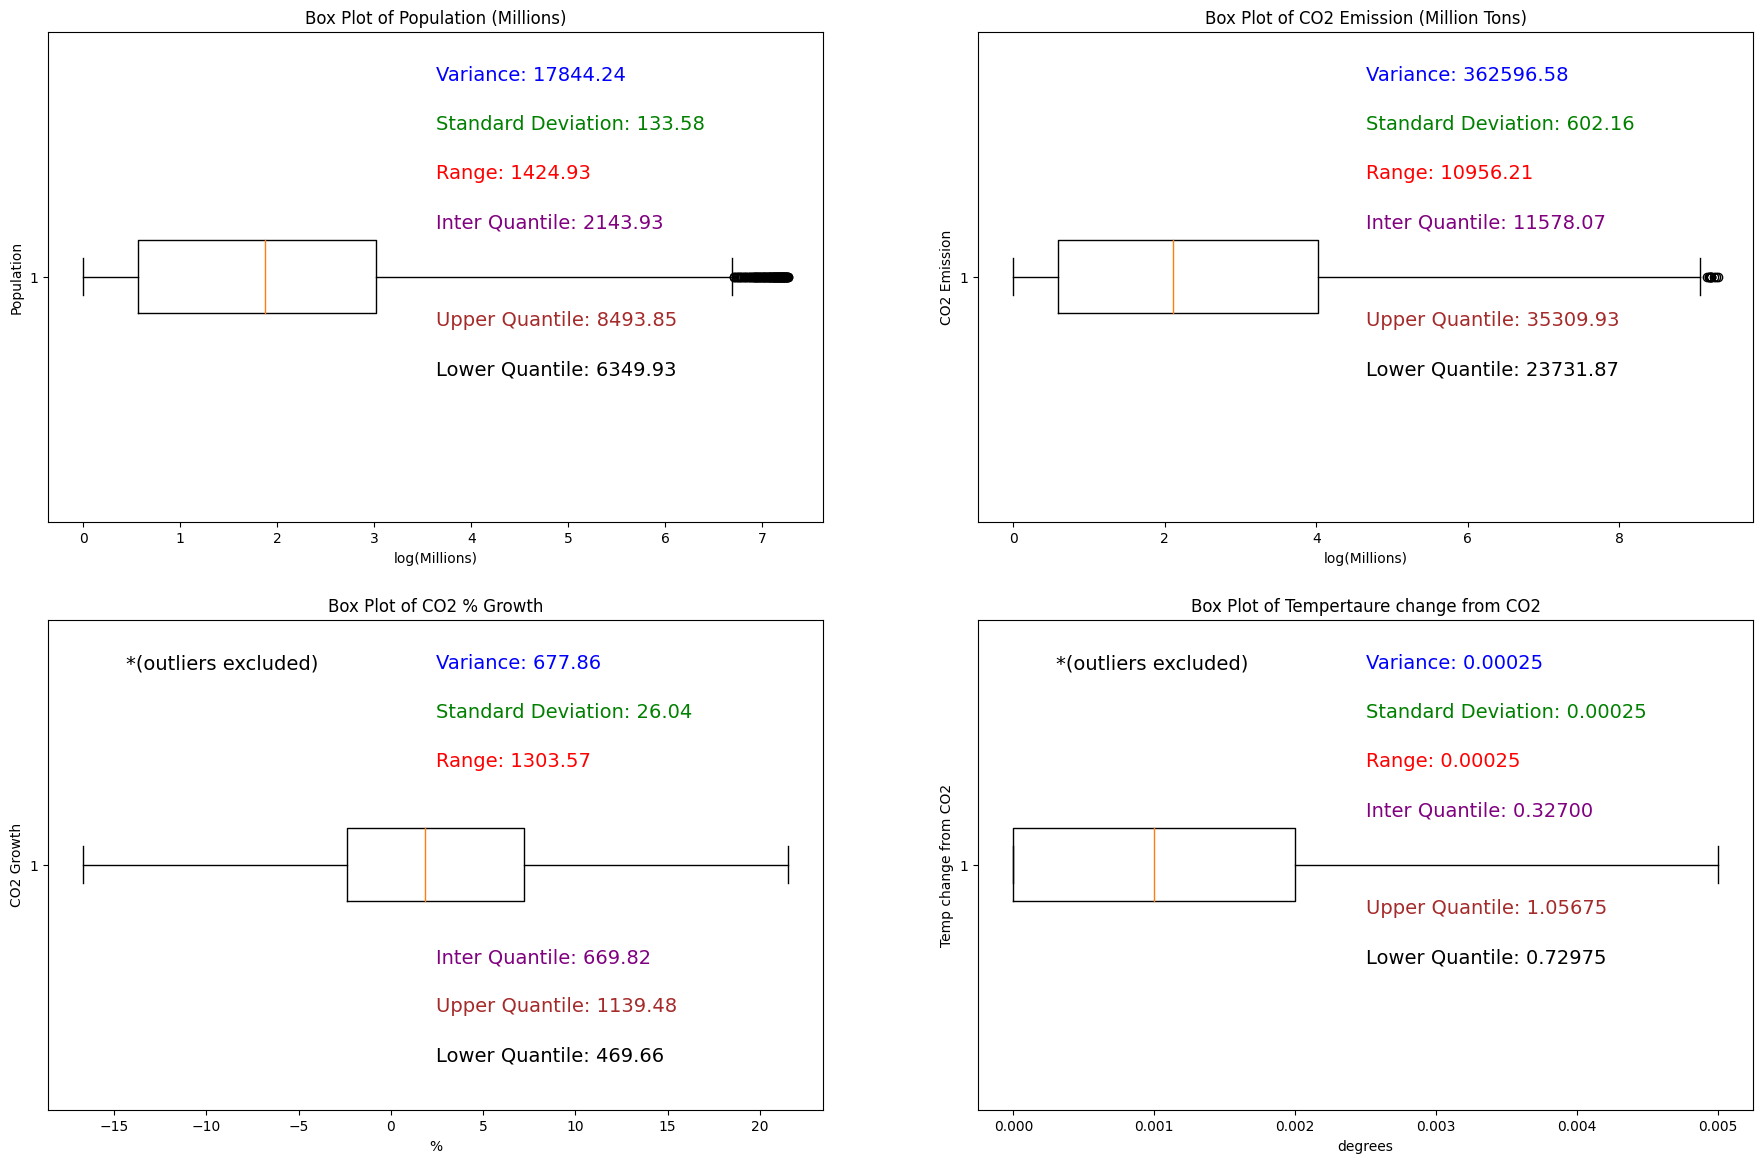

In [32]:
#Create a grid with 2 x 2 Grid for subplots
fig, ax = plt.subplots(2,2, figsize=(22, 14))

#create the boxplot with log of values in Population (Millions) column
ax[0,0].boxplot(filteredDataset['Population (Millions)'].apply(lambda x: np.log1p(x)), vert=False)
#set the label on x and y axis
ax[0,0].set_xlabel('log(Millions)')
ax[0,0].set_ylabel('Population')
#set the title 
ax[0,0].set_title('Box Plot of Population (Millions)')
# add texts of measure of central spread and qunatiles
ax[0,0].text(0.5, 0.9, f'Variance: {populationVariance:.2f}', color='blue', fontsize = 14 ,transform=ax[0,0].transAxes)
ax[0,0].text(0.5, 0.8, f'Standard Deviation: {populationStd:.2f}', color='green', fontsize = 14 ,transform=ax[0,0].transAxes)
ax[0,0].text(0.5, 0.7, f'Range: {populationRange:.2f}', color='red', fontsize = 14 ,transform=ax[0,0].transAxes)
ax[0,0].text(0.5, 0.6, f'Inter Quantile: {interQuantilePopulation:.2f}', color='purple', fontsize = 14 ,transform=ax[0,0].transAxes)
ax[0,0].text(0.5, 0.4, f'Upper Quantile: {upperQuantilePopulation:.2f}', color='brown', fontsize = 14 ,transform=ax[0,0].transAxes)
ax[0,0].text(0.5, 0.3, f'Lower Quantile: {lowerQuantilePopulation:.2f}', color='black', fontsize = 14 ,transform=ax[0,0].transAxes)


#create the boxplot with log of values in CO2 emission (Million Tons) column
ax[0,1].boxplot(filteredDataset['CO2 emission (Million Tons)'].apply(lambda x: np.log1p(x)), vert=False)
#set the label on x and y axis
ax[0,1].set_xlabel('log(Millions)')
ax[0,1].set_ylabel('CO2 Emission')
#set the title 
ax[0,1].set_title('Box Plot of CO2 Emission (Million Tons)')
# add texts of measure of central spread and qunatiles
ax[0,1].text(0.5, 0.9, f'Variance: {co2Variance:.2f}', color='blue', fontsize = 14 ,transform=ax[0,1].transAxes)
ax[0,1].text(0.5, 0.8, f'Standard Deviation: {co2Std:.2f}', color='green', fontsize = 14 ,transform=ax[0,1].transAxes)
ax[0,1].text(0.5, 0.7, f'Range: {co2Range:.2f}', color='red', fontsize = 14 ,transform=ax[0,1].transAxes)
ax[0,1].text(0.5, 0.6, f'Inter Quantile: {interQuantileCo2:.2f}', color='purple', fontsize = 14 ,transform=ax[0,1].transAxes)
ax[0,1].text(0.5, 0.4, f'Upper Quantile: {upperQuantileCo2:.2f}', color='brown', fontsize = 14 ,transform=ax[0,1].transAxes)
ax[0,1].text(0.5, 0.3, f'Lower Quantile: {lowerQuantileCo2:.2f}', color='black', fontsize = 14 ,transform=ax[0,1].transAxes)


#create the boxplot 
ax[1,0].boxplot(filteredDataset['CO2 % Growth'],showfliers=False, vert=False)
#set the label on x and y axis
ax[1,0].set_xlabel('%')
ax[1,0].set_ylabel('CO2 Growth')
#set the title 
ax[1,0].set_title('Box Plot of CO2 % Growth') 
# add texts of measure of central spread and qunatiles
ax[1,0].text(0.5, 0.9, f'Variance: {co2PercentageGrowthVariance:.2f}', color='blue', fontsize = 14 ,transform=ax[1,0].transAxes)
ax[1,0].text(0.5, 0.8, f'Standard Deviation: {co2PercentageGrowthStd:.2f}', color='green', fontsize = 14 ,transform=ax[1,0].transAxes)
ax[1,0].text(0.5, 0.7, f'Range: {co2PercentageGrowthRange:.2f}', color='red', fontsize = 14 ,transform=ax[1,0].transAxes)
ax[1,0].text(0.5, 0.3, f'Inter Quantile: {interQuantileCo2PercentageGrowth:.2f}', color='purple', fontsize = 14 ,transform=ax[1,0].transAxes)
ax[1,0].text(0.5, 0.2, f'Upper Quantile: {upperQuantileCo2PercentageGrowth:.2f}', color='brown', fontsize = 14 ,transform=ax[1,0].transAxes)
ax[1,0].text(0.5, 0.1, f'Lower Quantile: {lowerQuantileCo2PercentageGrowth:.2f}', color='black', fontsize = 14 ,transform=ax[1,0].transAxes)
ax[1,0].text(0.1, 0.9, '*(outliers excluded)', fontsize = 14 ,transform=ax[1,0].transAxes)


#create the boxplot with log of values in Population 
ax[1,1].boxplot(filteredDataset['Temp_Change_from_CO2'], vert=False, showfliers=False)
#set the label on x and y axis
ax[1,1].set_xlabel('degrees')
ax[1,1].set_ylabel('Temp change from CO2')
#set the title 
ax[1,1].set_title('Box Plot of Tempertaure change from CO2')
# add texts of measure of central spread and qunatiles
ax[1,1].text(0.5, 0.9, f'Variance: {tempChangeVariance:.5f}', color='blue', fontsize = 14 ,transform=ax[1,1].transAxes)
ax[1,1].text(0.5, 0.8, f'Standard Deviation: {tempChangeVariance:.5f}', color='green', fontsize = 14 ,transform=ax[1,1].transAxes)
ax[1,1].text(0.5, 0.7, f'Range: {tempChangeVariance:.5f}', color='red', fontsize = 14 ,transform=ax[1,1].transAxes)
ax[1,1].text(0.5, 0.6, f'Inter Quantile: {interQuantileTempChange:.5f}', color='purple', fontsize = 14 ,transform=ax[1,1].transAxes)
ax[1,1].text(0.5, 0.4, f'Upper Quantile: {upperQuantileTempChange:.5f}', color='brown', fontsize = 14 ,transform=ax[1,1].transAxes)
ax[1,1].text(0.5, 0.3, f'Lower Quantile: {lowerQuantileTempChange:.5f}', color='black', fontsize = 14 ,transform=ax[1,1].transAxes)
ax[1,1].text(0.1, 0.9, '*(outliers excluded)', fontsize = 14 ,transform=ax[1,1].transAxes)




plt.show()

<div class="alert alert-block alert-success">
Box plot is shown above for each column selected of the specific dataset
</div>

<div class="alert alert-block alert-info">
    Measure of spread for annualCo2Data
</div>

In [33]:
#the code written in the cells below is written by me

In [34]:
#Get the variance
populationVariance = annualCo2Data['Population (Millions)'].var()
#Get the standard deviation
populationStd = annualCo2Data['Population (Millions)'].std()
# Get the range of values in the column
populationRange = annualCo2Data['Population (Millions)'].max() - filteredDataset['Population (Millions)'].min()

#Get the variance
co2Variance = annualCo2Data['CO2 emission (Million Tons)'].var()
#Get the standard deviation
co2Std = annualCo2Data['CO2 emission (Million Tons)'].std()
# Get the range of values in the column
co2Range = annualCo2Data['CO2 emission (Million Tons)'].max() - filteredDataset['CO2 emission (Million Tons)'].min()

#Get the variance
co2PercentageGrowthVariance = annualCo2Data['CO2 % Growth'].var()
#Get the standard deviation
co2PercentageGrowthStd = annualCo2Data['CO2 % Growth'].std()
# Get the range of values in the column
co2PercentageGrowthRange = annualCo2Data['CO2 % Growth'].max() - filteredDataset['CO2 % Growth'].min()

#Get the variance
tempChangeVariance = annualCo2Data['Temp_Change_from_CO2'].var()
#Get the standard deviation
tempChangeStd = annualCo2Data['Temp_Change_from_CO2'].std()
# Get the range of values in the column
tempChangeRange = annualCo2Data['Temp_Change_from_CO2'].max() - filteredDataset['Temp_Change_from_CO2'].min()


#Print all the values
print("Measures of Spread of Filtered DataSet"
      "\n\nVariance of Population: ", populationVariance,
      "\nStandard Deviation of Population: ", populationStd,
      "\nRange of Population: ", populationRange,
      "\n\nVariance of CO2 Emission: ", co2Variance,
      "\nStandard Deviation of CO2 Emission: ", co2Std,
      "\nRange of CO2 Emission: ", co2Range,
      "\n\nVariance of CO2 % Growth: ", co2PercentageGrowthVariance,
      "\nStandard Deviation of CO2 % Growth: ", co2PercentageGrowthStd,
      "\nRange of CO2 % Growth: ", co2PercentageGrowthRange,
      "\n\nVariance of Temp Change: ", tempChangeVariance,
      "\nStandard Deviation of Temp Change: ", tempChangeStd,
      "\nRange of Temp Change: ", tempChangeRange
      
      
     )

Measures of Spread of Filtered DataSet

Variance of Population:  1716820.6446575772 
Standard Deviation of Population:  1310.2750263427818 
Range of Population:  9670.105 

Variance of CO2 Emission:  40138631.052535005 
Standard Deviation of CO2 Emission:  6335.505587759749 
Range of CO2 Emission:  38833.616 

Variance of CO2 % Growth:  347412.88121292053 
Standard Deviation of CO2 % Growth:  589.4174083049469 
Range of CO2 % Growth:  2426.191 

Variance of Temp Change:  0.03861884871794872 
Standard Deviation of Temp Change:  0.1965167899136069 
Range of Temp Change:  1.248


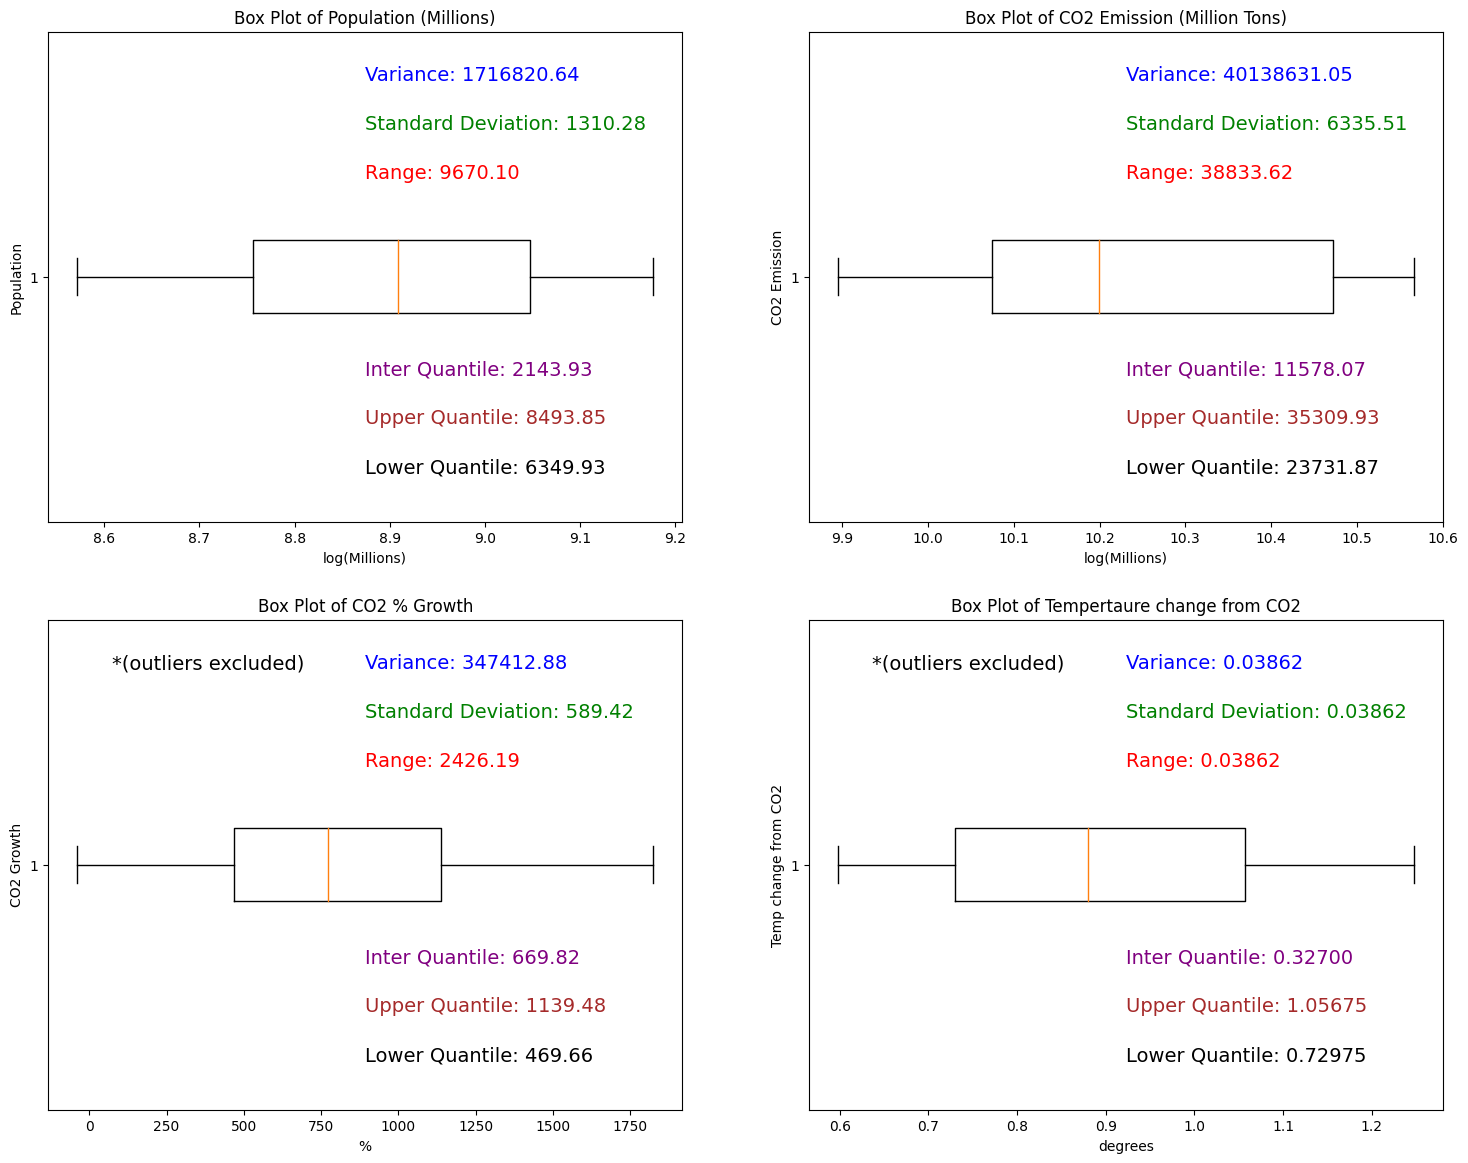

In [35]:
#Create a grid with 2 x 2 Grid for subplots
fig, ax = plt.subplots(2,2, figsize=(18, 14))

#create the boxplot with log of values in Population (Millions) column
ax[0,0].boxplot(annualCo2Data['Population (Millions)'].apply(lambda x: np.log1p(x)), vert=False)
#set the label on x and y axis
ax[0,0].set_xlabel('log(Millions)')
ax[0,0].set_ylabel('Population')
#set the title 
ax[0,0].set_title('Box Plot of Population (Millions)')
# add texts of measure of central spread and qunatiles
ax[0,0].text(0.5, 0.9, f'Variance: {populationVariance:.2f}', color='blue', fontsize = 14 ,transform=ax[0,0].transAxes)
ax[0,0].text(0.5, 0.8, f'Standard Deviation: {populationStd:.2f}', color='green', fontsize = 14 ,transform=ax[0,0].transAxes)
ax[0,0].text(0.5, 0.7, f'Range: {populationRange:.2f}', color='red', fontsize = 14 ,transform=ax[0,0].transAxes)
ax[0,0].text(0.5, 0.3, f'Inter Quantile: {interQuantilePopulation:.2f}', color='purple', fontsize = 14 ,transform=ax[0,0].transAxes)
ax[0,0].text(0.5, 0.2, f'Upper Quantile: {upperQuantilePopulation:.2f}', color='brown', fontsize = 14 ,transform=ax[0,0].transAxes)
ax[0,0].text(0.5, 0.1, f'Lower Quantile: {lowerQuantilePopulation:.2f}', color='black', fontsize = 14 ,transform=ax[0,0].transAxes)


#create the boxplot with log of values in CO2 emission (Million Tons) column
ax[0,1].boxplot(annualCo2Data['CO2 emission (Million Tons)'].apply(lambda x: np.log1p(x)), vert=False)
#set the label on x and y axis
ax[0,1].set_xlabel('log(Millions)')
ax[0,1].set_ylabel('CO2 Emission')
#set the title 
ax[0,1].set_title('Box Plot of CO2 Emission (Million Tons)')
# add texts of measure of central spread and qunatiles
ax[0,1].text(0.5, 0.9, f'Variance: {co2Variance:.2f}', color='blue', fontsize = 14 ,transform=ax[0,1].transAxes)
ax[0,1].text(0.5, 0.8, f'Standard Deviation: {co2Std:.2f}', color='green', fontsize = 14 ,transform=ax[0,1].transAxes)
ax[0,1].text(0.5, 0.7, f'Range: {co2Range:.2f}', color='red', fontsize = 14 ,transform=ax[0,1].transAxes)
ax[0,1].text(0.5, 0.3, f'Inter Quantile: {interQuantileCo2:.2f}', color='purple', fontsize = 14 ,transform=ax[0,1].transAxes)
ax[0,1].text(0.5, 0.2, f'Upper Quantile: {upperQuantileCo2:.2f}', color='brown', fontsize = 14 ,transform=ax[0,1].transAxes)
ax[0,1].text(0.5, 0.1, f'Lower Quantile: {lowerQuantileCo2:.2f}', color='black', fontsize = 14 ,transform=ax[0,1].transAxes)

#create the boxplot 
ax[1,0].boxplot(annualCo2Data['CO2 % Growth'],showfliers=False, vert=False)
#set the label on x and y axis
ax[1,0].set_xlabel('%')
ax[1,0].set_ylabel('CO2 Growth')
#set the title 
ax[1,0].set_title('Box Plot of CO2 % Growth') 
# add texts of measure of central spread and qunatiles
ax[1,0].text(0.5, 0.9, f'Variance: {co2PercentageGrowthVariance:.2f}', color='blue', fontsize = 14 ,transform=ax[1,0].transAxes)
ax[1,0].text(0.5, 0.8, f'Standard Deviation: {co2PercentageGrowthStd:.2f}', color='green', fontsize = 14 ,transform=ax[1,0].transAxes)
ax[1,0].text(0.5, 0.7, f'Range: {co2PercentageGrowthRange:.2f}', color='red', fontsize = 14 ,transform=ax[1,0].transAxes)
ax[1,0].text(0.5, 0.3, f'Inter Quantile: {interQuantileCo2PercentageGrowth:.2f}', color='purple', fontsize = 14 ,transform=ax[1,0].transAxes)
ax[1,0].text(0.5, 0.2, f'Upper Quantile: {upperQuantileCo2PercentageGrowth:.2f}', color='brown', fontsize = 14 ,transform=ax[1,0].transAxes)
ax[1,0].text(0.5, 0.1, f'Lower Quantile: {lowerQuantileCo2PercentageGrowth:.2f}', color='black', fontsize = 14 ,transform=ax[1,0].transAxes)
ax[1,0].text(0.1, 0.9, '*(outliers excluded)', fontsize = 14 ,transform=ax[1,0].transAxes)

#create the boxplot
ax[1,1].boxplot(annualCo2Data['Temp_Change_from_CO2'], vert=False, showfliers=False)
#set the label on x and y axis
ax[1,1].set_xlabel('degrees')
ax[1,1].set_ylabel('Temp change from CO2')
#set the title 
ax[1,1].set_title('Box Plot of Tempertaure change from CO2')
# add texts of measure of central spread and qunatiles
ax[1,1].text(0.5, 0.9, f'Variance: {tempChangeVariance:.5f}', color='blue', fontsize = 14 ,transform=ax[1,1].transAxes)
ax[1,1].text(0.5, 0.8, f'Standard Deviation: {tempChangeVariance:.5f}', color='green', fontsize = 14 ,transform=ax[1,1].transAxes)
ax[1,1].text(0.5, 0.7, f'Range: {tempChangeVariance:.5f}', color='red', fontsize = 14 ,transform=ax[1,1].transAxes)
ax[1,1].text(0.5, 0.3, f'Inter Quantile: {interQuantileTempChange:.5f}', color='purple', fontsize = 14 ,transform=ax[1,1].transAxes)
ax[1,1].text(0.5, 0.2, f'Upper Quantile: {upperQuantileTempChange:.5f}', color='brown', fontsize = 14 ,transform=ax[1,1].transAxes)
ax[1,1].text(0.5, 0.1, f'Lower Quantile: {lowerQuantileTempChange:.5f}', color='black', fontsize = 14 ,transform=ax[1,1].transAxes)
ax[1,1].text(0.1, 0.9, '*(outliers excluded)', fontsize = 14 ,transform=ax[1,1].transAxes)




plt.show()

<div class="alert alert-block alert-success">
   Box plot is shown above for each column selected of the specific dataset
</div>

<h4>Type of Distribution</h4>

<div class="alert alert-block alert-info">
    In this sub-subsection we will find the type of distribution of both the dataset. For that we will find and 
    visualize Skew and Kurosis of specific columns.
</div>

<div class="alert alert-block alert-info">
    Type of Distribution for filteredDataset
</div>

In [36]:
#get the skew value
populationSkew = filteredDataset['Population (Millions)'].skew()
#get the kurtosis value
populationKurtosis = filteredDataset['Population (Millions)'].kurtosis()

#get the skew value
co2Skew = filteredDataset['CO2 emission (Million Tons)'].skew()
#get the kurtosis value
co2Kurtosis = filteredDataset['CO2 emission (Million Tons)'].kurtosis()

#get the skew value
co2PercentageGrowthSkew = filteredDataset['CO2 % Growth'].skew()
#get the kurtosis value
co2PercentageGrowthKurtosis = filteredDataset['CO2 % Growth'].kurtosis()

#get the skew value
tempChangeSkew = filteredDataset['Temp_Change_from_CO2'].skew()
#get the kurtosis value
tempChangeKurtosis = filteredDataset['Temp_Change_from_CO2'].kurtosis()

#print the type of distribution values
print("\n\nSkewness of Population: ", populationSkew,
      "\nKurtosis of Population: ", populationKurtosis,
      "\n\nSkewness of CO2 Emission: ", co2Skew,
      "\nKurtosis of CO2 Emission: ", co2Kurtosis,
      "\n\nSkewness of CO2 % Growth: ", co2PercentageGrowthSkew,
      "\nKurtosis of CO2 % Growth: ", co2PercentageGrowthKurtosis,
      "\n\nSkewness of Temp Change: ", tempChangeSkew,
      "\nKurtosis of Temp Change: ", tempChangeKurtosis
     )



Skewness of Population:  7.6388611943046785 
Kurtosis of Population:  63.40542301496386 

Skewness of CO2 Emission:  10.394104436244648 
Kurtosis of CO2 Emission:  132.70431891658092 

Skewness of CO2 % Growth:  21.443904079262992 
Kurtosis of CO2 % Growth:  766.0334653419587 

Skewness of Temp Change:  8.488366217812052 
Kurtosis of Temp Change:  90.1881874655099


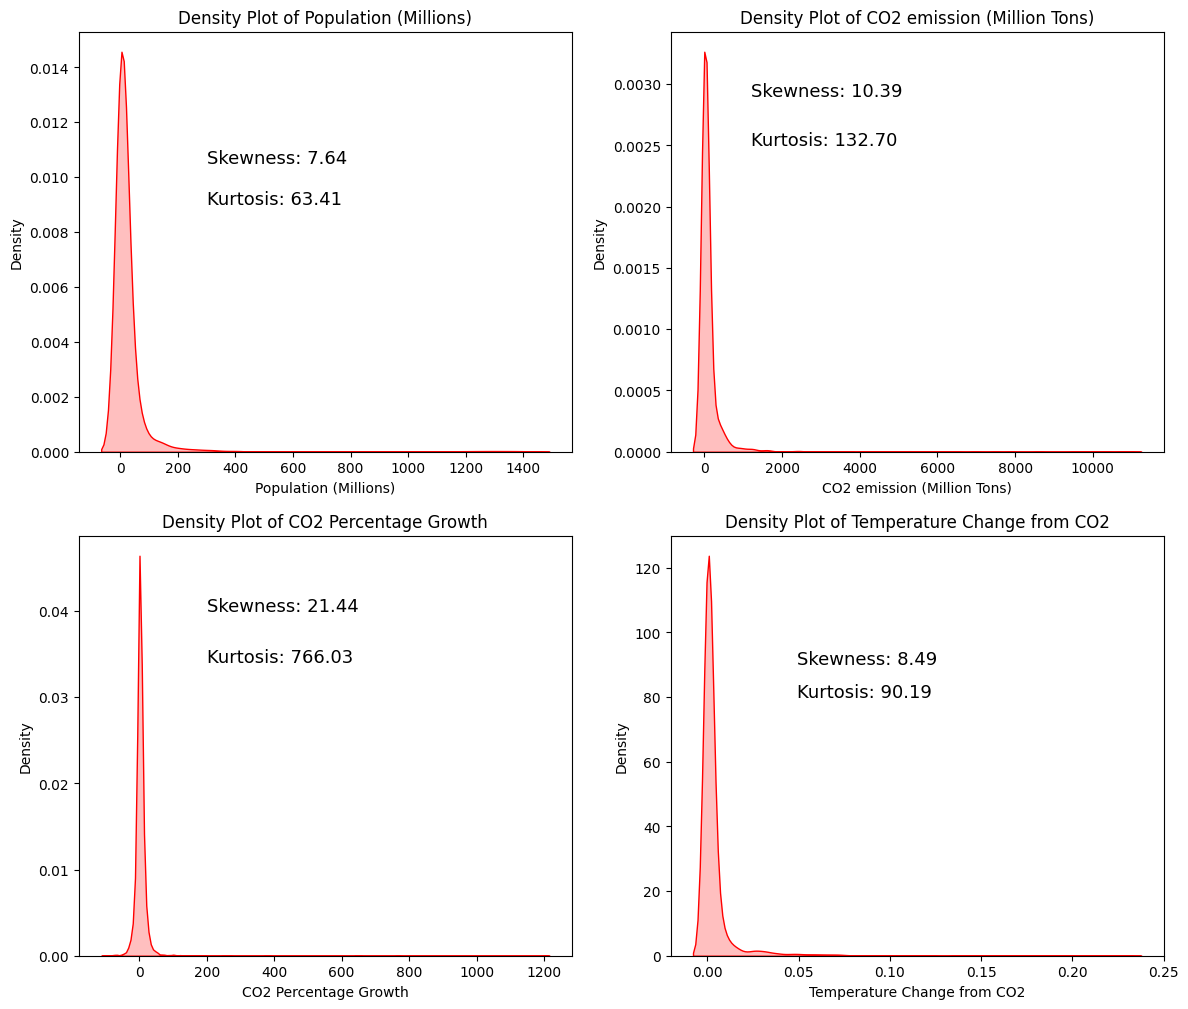

In [37]:
# Plot density plot
import seaborn as sns
#Create a grid with 2 x 2 Grid for subplots
fig, ax = plt.subplots(2,2, figsize=(14, 12))

#create density plot
sns.kdeplot(filteredDataset['Population (Millions)'], color = 'red', fill = "True", ax=ax[0,0])
#set labels on x and y axis
ax[0,0].set_xlabel('Population (Millions)')
ax[0,0].set_ylabel('Density')
#set the title
ax[0,0].set_title('Density Plot of Population (Millions)')
#display the skew and kurtosis values on the figure
ax[0,0].text(300, 0.0105, f"Skewness: {populationSkew:.2f}", fontsize = 13)
ax[0,0].text(300, 0.009, f"Kurtosis: {populationKurtosis:.2f}", fontsize = 13)

#create density plot
sns.kdeplot(filteredDataset['CO2 emission (Million Tons)'], color = 'red', fill = "True", ax=ax[0,1])
#set labels on x and y axis
ax[0,1].set_xlabel('CO2 emission (Million Tons)')
ax[0,1].set_ylabel('Density')
#set the title
ax[0,1].set_title('Density Plot of CO2 emission (Million Tons)')
#display the skew and kurtosis values on the figure
ax[0,1].text(1200, 0.0029, f"Skewness: {co2Skew:.2f}", fontsize = 13)
ax[0,1].text(1200, 0.0025, f"Kurtosis: {co2Kurtosis:.2f}", fontsize = 13)


#create density plot
sns.kdeplot(filteredDataset['CO2 % Growth'], color = 'red', fill = "True", ax=ax[1,0])
#set labels on x and y axis
ax[1,0].set_xlabel('CO2 Percentage Growth')
ax[1,0].set_ylabel('Density')
#set the title
ax[1,0].set_title('Density Plot of CO2 Percentage Growth')
#display the skew and kurtosis values on the figure
ax[1,0].text(200, 0.04, f"Skewness: {co2PercentageGrowthSkew:.2f}", fontsize = 13)
ax[1,0].text(200, 0.034, f"Kurtosis: {co2PercentageGrowthKurtosis:.2f}", fontsize = 13)

#create density plot
sns.kdeplot(filteredDataset['Temp_Change_from_CO2'], color = 'red', fill = "True", ax=ax[1,1])
#set labels on x and y axis
ax[1,1].set_xlabel('Temperature Change from CO2')
ax[1,1].set_ylabel('Density')
#set the title
ax[1,1].set_title('Density Plot of Temperature Change from CO2')
#display the skew and kurtosis values on the figure
ax[1,1].text(0.049, 90, f"Skewness: {tempChangeSkew:.2f}", fontsize = 13)
ax[1,1].text(0.049, 80, f"Kurtosis: {tempChangeKurtosis:.2f}", fontsize = 13)


plt.show()

<div class="alert alert-block alert-info">
    Above visualization represent skew and kurtosis of the specific dataset.
</div>

<div class="alert alert-block alert-info">
    Type of Distribution for annualCo2Data Dataset
</div>

In [38]:
#get the skew value
populationSkew = annualCo2Data['Population (Millions)'].skew()
#get the kurtosis value
populationKurtosis = annualCo2Data['Population (Millions)'].kurtosis()

#get the skew value
co2Skew = annualCo2Data['CO2 emission (Million Tons)'].skew()
#get the kurtosis value
co2Kurtosis = annualCo2Data['CO2 emission (Million Tons)'].kurtosis()

#get the skew value
co2PercentageGrowthSkew = annualCo2Data['CO2 % Growth'].skew()
#get the kurtosis value
co2PercentageGrowthKurtosis = annualCo2Data['CO2 % Growth'].kurtosis()

#get the skew value
tempChangeSkew = annualCo2Data['Temp_Change_from_CO2'].skew()
#get the kurtosis value
tempChangeKurtosis = annualCo2Data['Temp_Change_from_CO2'].kurtosis()

#print the type of distribution values
print("\n\nSkewness of Population: ", populationSkew,
      "\nKurtosis of Population: ", populationKurtosis,
      "\n\nSkewness of CO2 Emission: ", co2Skew,
      "\nKurtosis of CO2 Emission: ", co2Kurtosis,
      "\n\nSkewness of CO2 % Growth: ", co2PercentageGrowthSkew,
      "\nKurtosis of CO2 % Growth: ", co2PercentageGrowthKurtosis,
      "\n\nSkewness of Temp Change: ", tempChangeSkew,
      "\nKurtosis of Temp Change: ", tempChangeKurtosis
     )



Skewness of Population:  0.0551234129111522 
Kurtosis of Population:  -1.160524930107996 

Skewness of CO2 Emission:  0.24963286523890452 
Kurtosis of CO2 Emission:  -1.4438454665119806 

Skewness of CO2 % Growth:  -0.2967193946047607 
Kurtosis of CO2 % Growth:  2.2668727583072132 

Skewness of Temp Change:  0.21261777917159705 
Kurtosis of Temp Change:  -1.1847951742430394


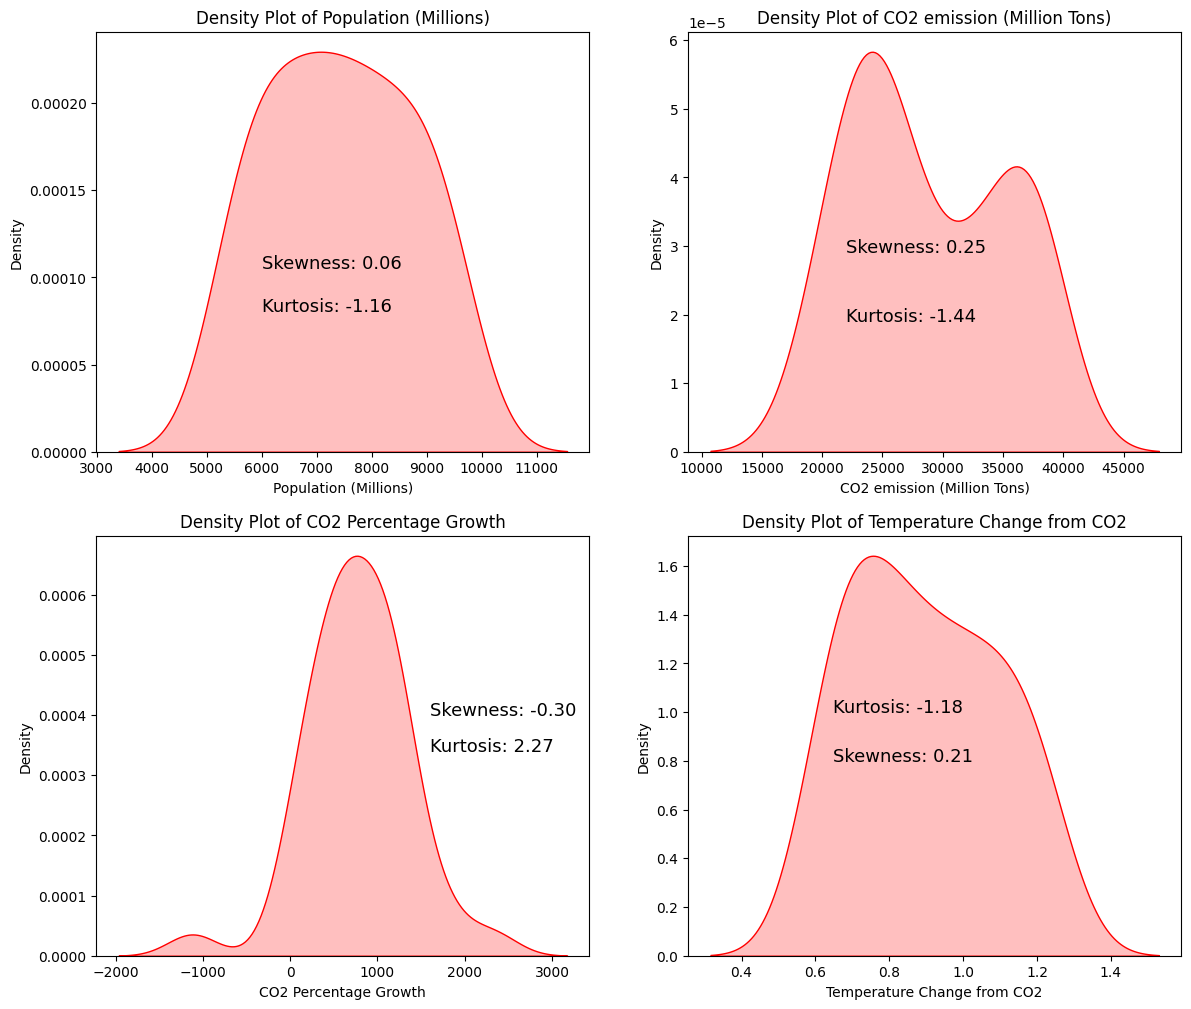

In [39]:
# Plot density plot
import seaborn as sns
#Create a grid with 2 x 2 Grid for subplots
fig, ax = plt.subplots(2,2, figsize=(14, 12))

#create density plot
sns.kdeplot(annualCo2Data['Population (Millions)'], color = 'red', fill = "True", ax=ax[0,0])
#set labels on x and y axis
ax[0,0].set_xlabel('Population (Millions)')
ax[0,0].set_ylabel('Density')
#set the title
ax[0,0].set_title('Density Plot of Population (Millions)')
#display the skew and kurtosis values on the figure
ax[0,0].text(6000, 0.000105, f"Skewness: {populationSkew:.2f}", fontsize = 13)
ax[0,0].text(6000, 0.0000804, f"Kurtosis: {populationKurtosis:.2f}", fontsize = 13)

#create density plot
sns.kdeplot(annualCo2Data['CO2 emission (Million Tons)'], color = 'red', fill = "True", ax=ax[0,1])
#set labels on x and y axis
ax[0,1].set_xlabel('CO2 emission (Million Tons)')
ax[0,1].set_ylabel('Density')
#set the title
ax[0,1].set_title('Density Plot of CO2 emission (Million Tons)')
#display the skew and kurtosis values on the figure
ax[0,1].text(22000, 0.000029, f"Skewness: {co2Skew:.2f}", fontsize = 13)
ax[0,1].text(22000, 0.000019, f"Kurtosis: {co2Kurtosis:.2f}", fontsize = 13)


#create density plot
sns.kdeplot(annualCo2Data['CO2 % Growth'], color = 'red', fill = "True", ax=ax[1,0])
#set labels on x and y axis
ax[1,0].set_xlabel('CO2 Percentage Growth')
ax[1,0].set_ylabel('Density')
#set the title
ax[1,0].set_title('Density Plot of CO2 Percentage Growth')
#display the skew and kurtosis values on the figure
ax[1,0].text(1600, 0.0004, f"Skewness: {co2PercentageGrowthSkew:.2f}", fontsize = 13)
ax[1,0].text(1600, 0.00034, f"Kurtosis: {co2PercentageGrowthKurtosis:.2f}", fontsize = 13)

#create density plot
sns.kdeplot(annualCo2Data['Temp_Change_from_CO2'], color = 'red', fill = "True", ax=ax[1,1])
#set labels on x and y axis
ax[1,1].set_xlabel('Temperature Change from CO2')
ax[1,1].set_ylabel('Density')
#set the title
ax[1,1].set_title('Density Plot of Temperature Change from CO2')
#display the skew and kurtosis values on the figure
ax[1,1].text(0.649, 0.8, f"Skewness: {tempChangeSkew:.2f}", fontsize = 13)
ax[1,1].text(0.649, 1.0, f"Kurtosis: {tempChangeKurtosis:.2f}", fontsize = 13)


plt.show()

<div class="alert alert-block alert-info">
    Now we will create a 2 Dimensional Histogram to understand the relationship between Population (Millions) and CO2 
    emission (Million Tons)
    
</div>

<div class="alert alert-block alert-info">
    2D Histogram for filteredDatasete   
</div>

In [40]:
#code i have written without assistance ends here

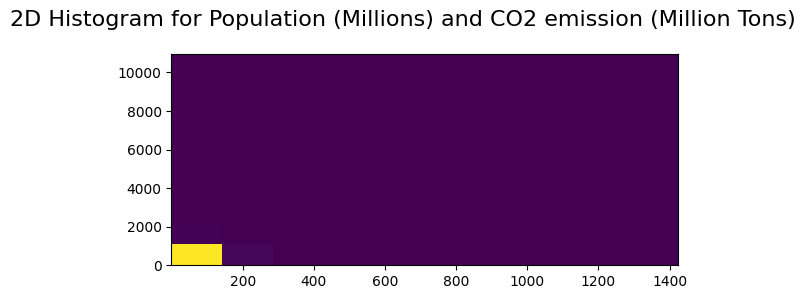

In [41]:
#Create a grid with 2 x 2 Grid for subplots and figure size 6 x 3
fig, axs = plt.subplots(figsize=(6, 3))

#Adding a 2d Histogram for two columns
axs.hist2d(filteredDataset['Population (Millions)'], filteredDataset['CO2 emission (Million Tons)'])

#Add a main title for the figure
plt.suptitle('2D Histogram for Population (Millions) and CO2 emission (Million Tons)', fontsize=16)

plt.tight_layout()
plt.show()


<div class="alert alert-block alert-info">
    2D Histogram for annualCo2Data   
</div>

#Create a grid with 2 x 2 Grid for subplots and figure size 6 x 3
fig, axs = plt.subplots(figsize=(6, 3))

#Adding a 2d Histogram for two columns
axs.hist2d(annualCo2Data['Population (Millions)'], annualCo2Data['CO2 emission (Million Tons)'])

#Add a main title for the figure
plt.suptitle('2D Histogram for Population (Millions) and CO2 emission (Million Tons)', fontsize=16)

plt.tight_layout()
plt.show()


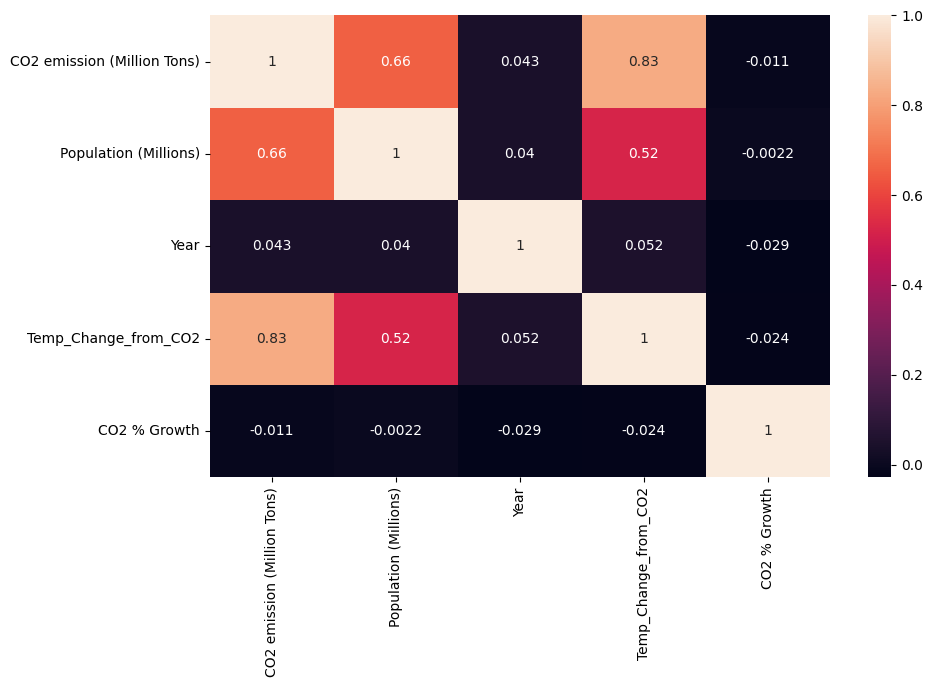

In [42]:
columnsTaken = ['CO2 emission (Million Tons)','Population (Millions)', 'Year', 'Temp_Change_from_CO2'
                   ,'CO2 % Growth']
#Create the heatmap
plt.figure(figsize=(10,6))
sns.heatmap(filteredDataset[columnsTaken].corr(), annot=True)

plt.show()

<div class="alert alert-block alert-info">
    Now we will create a heatmap of both the dataset to check how closely the columns in them are correlated to each 
    other. If a value is closer to 1 that means that the two columns are positively correlated and if a value is 
    closer to -1 that means that the two columns are negatively correlated. According to the heatmap above the most 
    positively correlated columns are Tempp_Change_from_CO2 with 0.83.
</div>

<div class="alert alert-block alert-info">
    2D Histogram for annuakCo2Data   
</div>

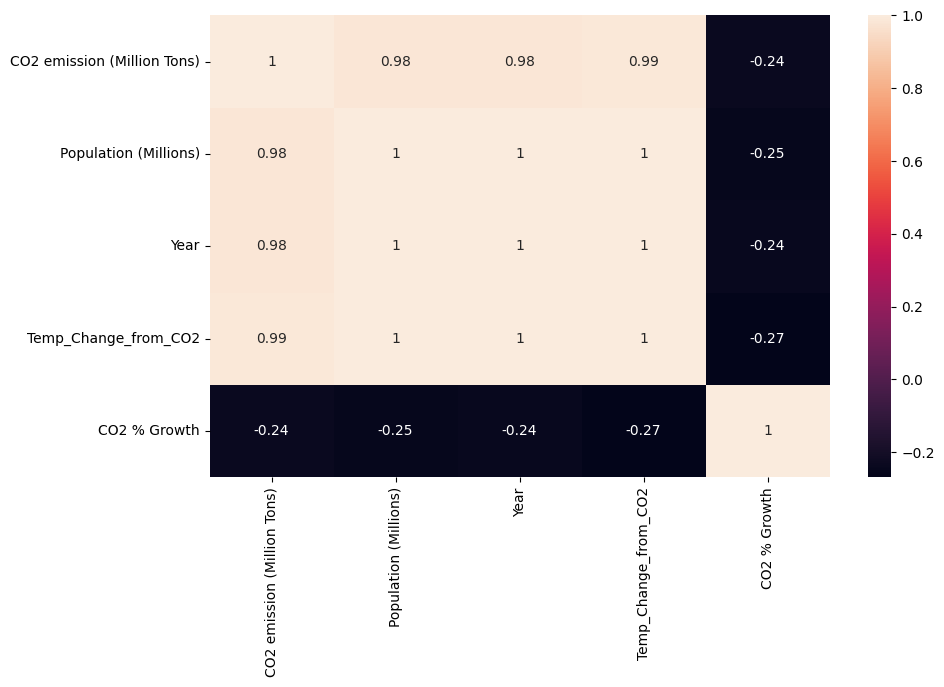

In [43]:
#Create the heatmap
plt.figure(figsize=(10,6))
sns.heatmap(annualCo2Data[columnsTaken].corr(), annot=True)

plt.show()

<div class="alert alert-block alert-info">
    Now we will create a heatmap of both the dataset to check how closely the columns in them are correlated to each 
    other. If a value is closer to 1 that means that the two columns are positively correlated and if a value is 
    closer to -1 that means that the two columns are negatively correlated. According to the heatmap there are many
    columns that are positively correlated. Correlation between CO2 Emission and Population is 0.98, so this shows 
    they have a good correlation. It is useful to know this since these columns will be used in linear regression
</div>

<div class="alert alert-block alert-info">
    We've successfully done statistical analysis of both the datasets, next we will move forward towards data 
    visualization.
</div>

<h2>Data Visualization</h2>

<div class="alert alert-block alert-info">
    In this section visualizations will be drawn to get useful information from both the datasets.
</div>

<div class="alert alert-block alert-info">
    We will do some preprocessing first. We will split the filteredDataset based on specific years. This will be 
    useful in presenting visualizations 
</div>

In [44]:
#this code is written by me
#separating data of 1980-200 and 2000-2020
Before200CountryData = filteredDataset[filteredDataset['Year'] < 2001 ]
After2000CountryData = filteredDataset[filteredDataset['Year'] > 2000 ]
#code i have written without assistance ends here

#summing all the countries
Before200CountryData = Before200CountryData.groupby('Country')['CO2 emission (Million Tons)'].sum().reset_index()
After2000CountryData = After2000CountryData.groupby('Country')['CO2 emission (Million Tons)'].sum().reset_index()


#Reset the index to 0
Before200CountryData = Before200CountryData.reset_index(drop=True)
After2000CountryData = After2000CountryData.reset_index(drop=True)

# Sort the dataset by Co2 Emission values in descending order
Before200CountryData = Before200CountryData.sort_values(by='CO2 emission (Million Tons)', ascending=False)
After2000CountryData = After2000CountryData.sort_values(by='CO2 emission (Million Tons)', ascending=False)

#Output details of new dataframe
After2000CountryData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 226 entries, 42 to 67
Data columns (total 2 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   Country                      226 non-null    category
 1   CO2 emission (Million Tons)  226 non-null    float64 
dtypes: category(1), float64(1)
memory usage: 13.8 KB


In [45]:
#installing the library called squarify
# !pip install squarify

In [46]:
#Print the styles available
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


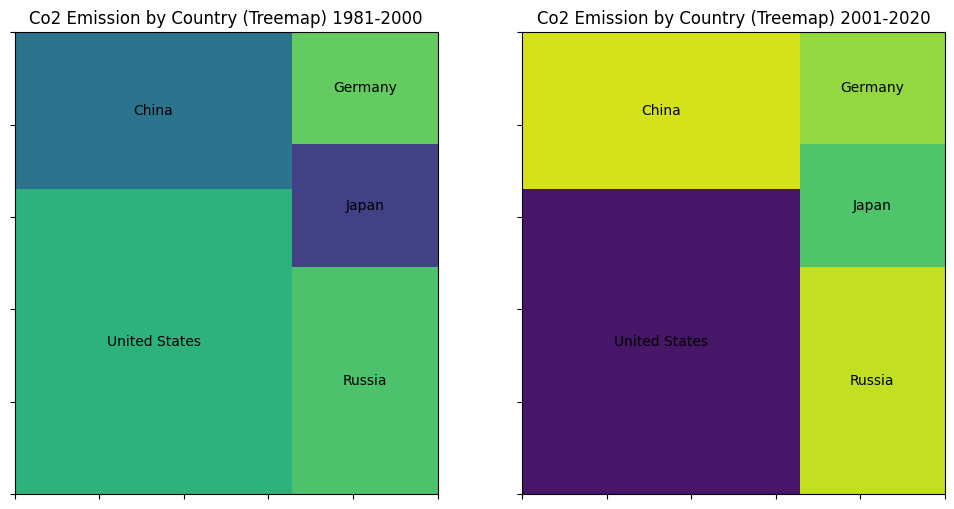

In [47]:
#importing the squarify library
import squarify 

# Select the top 5 cities from 1981-2000
BeforeTop5Cities = Before200CountryData.head(5)
# Select the top 10 cities from 1981-2000
BeforeTop10Cities = Before200CountryData.head(10)
# Select the top 20 cities from 1981-2000
BeforeTop20Cities = Before200CountryData.head(20)
## Select the top 5 cities from 2001-2020
AfterTop5Cities = After2000CountryData.head(5)
## Select the top 10 cities from 2001-2020
AfterTop10Cities = After2000CountryData.head(10)
## Select the top 20 cities from 2001-2020
AfterTop20Cities = After2000CountryData.head(20)

#Create a grid with 1 x 2 Grid for subplots and figure size 12 x 6
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Create Tree Map for top 5 cities in 1980-2000
squarify.plot(sizes=BeforeTop5Cities['CO2 emission (Million Tons)'], label=BeforeTop5Cities['Country'],ax=ax[0] )
#set the title of visualizatio
ax[0].set_title('Co2 Emission by Country (Treemap) 1981-2000')
# Remove tick label on x and y-axis
ax[0].set_xticklabels([])
ax[0].set_yticklabels([])

# Create Tree Map for top 5 cities in 2000-2020
squarify.plot(sizes=BeforeTop5Cities['CO2 emission (Million Tons)'], label=BeforeTop5Cities['Country'],ax=ax[1] )
# Remove tick label on x and y-axis
ax[1].set_title('Co2 Emission by Country (Treemap) 2001-2020')
ax[1].set_xticklabels([])
ax[1].set_yticklabels([])

#Show the figure
plt.show()

<div class="alert alert-block alert-info">
    The above two tree maps indicate the top 5 countries with most co2 emission during two time periods 19081-2000 and 
    2000-2020. Next we will create pie charts to see top 10 countries with most co2 emission in these periods.
</div>

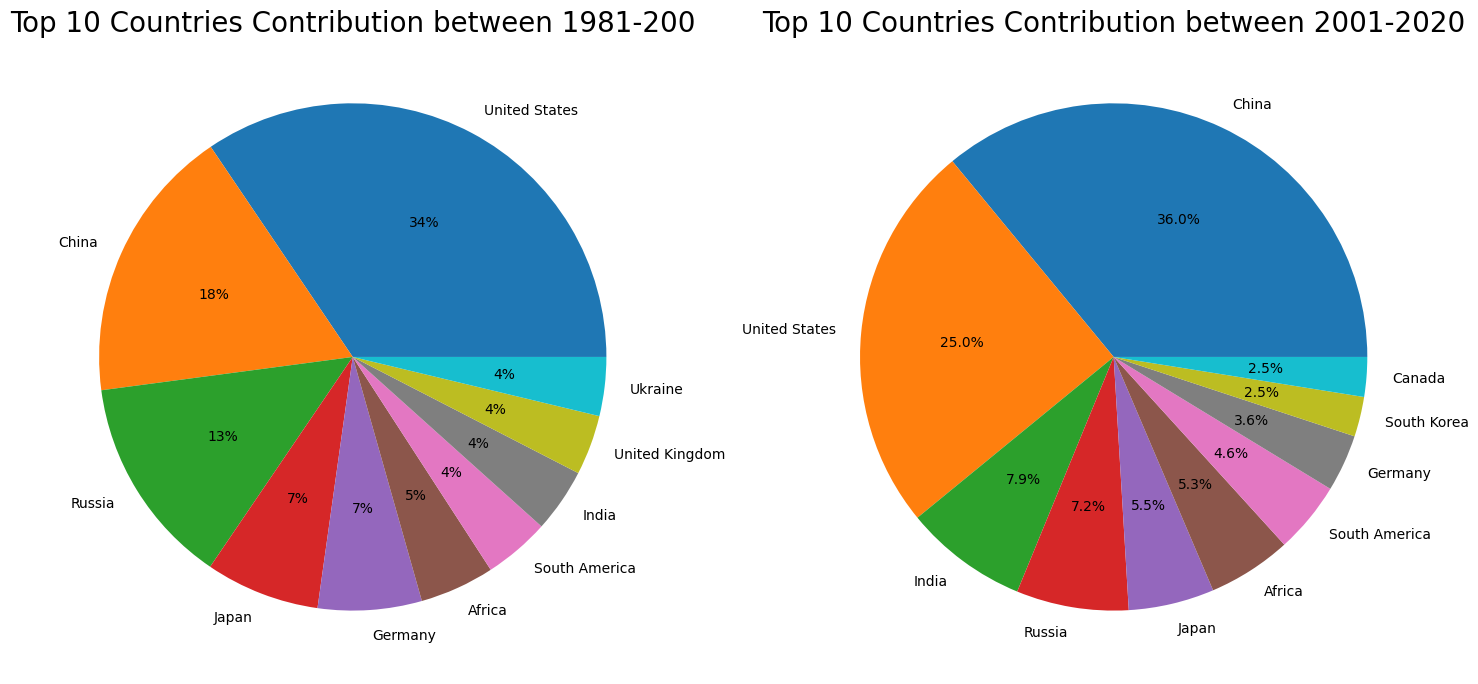

In [48]:
# Code is taken from matplotlib documentation adn then adapted accoring to the use
#Create a grid with 2 x 1 Grid for subplots and figure size 12 x 12
fig, axs = plt.subplots(1,2, figsize=(18, 12))
# Pie Chart for Top 10 Countries from 1981-2000
axs[0].pie(BeforeTop10Cities['CO2 emission (Million Tons)'], labels=BeforeTop10Cities['Country'], autopct='%1.f%%')
#Set the title
axs[0].set_title('Top 10 Countries Contribution between 1981-200', fontsize = 20)
# Pie Chart for Top 10 Countries from 2000-2020
axs[1].pie(AfterTop10Cities['CO2 emission (Million Tons)'], labels=AfterTop10Cities['Country'], autopct='%1.1f%%')
#Set the title
axs[1].set_title('Top 10 Countries Contribution between 2001-2020', fontsize = 20)
#Show the figure
plt.show()
# Code  taken from matplotlib documentation and then adapted accoring to the use ends here

<div class="alert alert-block alert-info">
Above visualization shows top 20 countries with most Co2 emission. A pie chart is used to show it and the percentage the contributed to co2 emission is labelled. Next we will visualize to see top 20 countries in both these periods and the amount of Co2 emissioned.
</div>

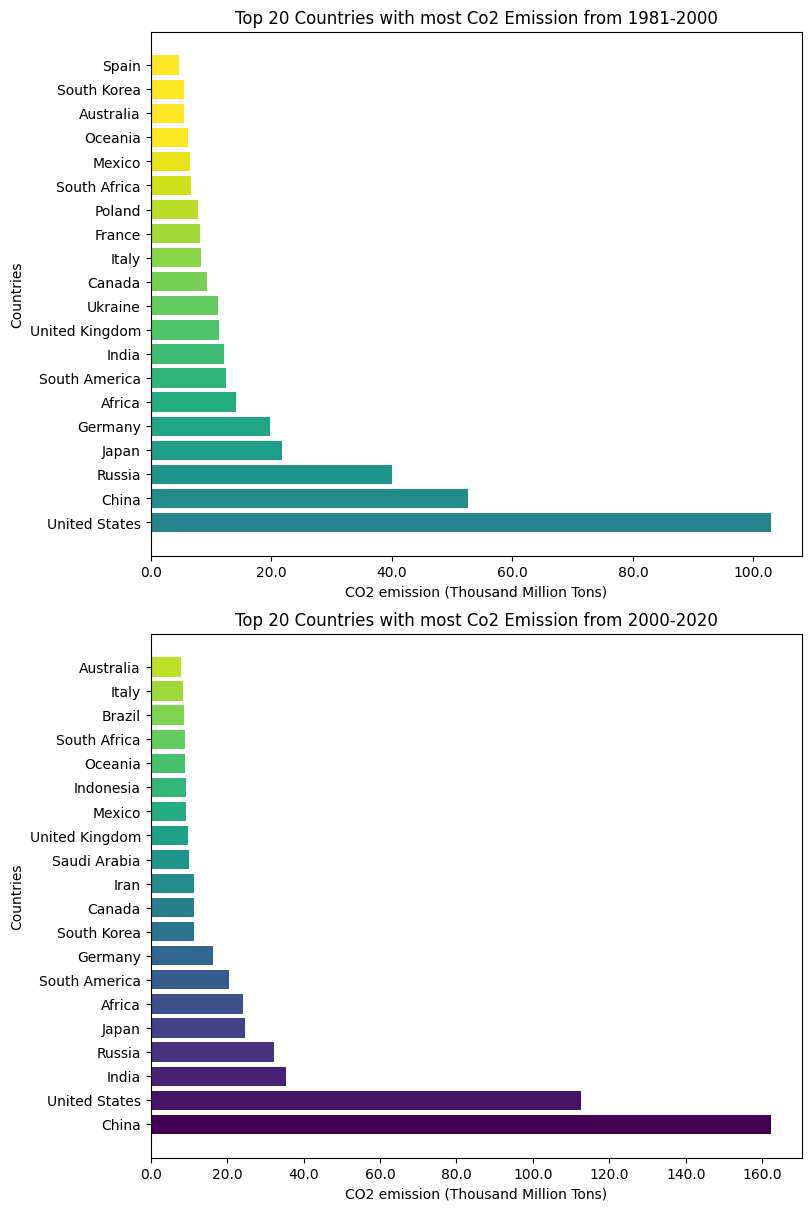

In [49]:
# Code is taken from matplotlib documentation and then adapted accoring to the use

#Fixes and makes room for the elements in the figure
plt.rcParams.update({'figure.autolayout': True})

#Function to change the format of the label of x-axis by dividing by 100
def changeXlabel(x, pos):
    s = '{}'.format(x/1000)
    return s

#Create a grid with 2 x 1 Grid for subplots and figure size 8 x qw
fig, ax = plt.subplots(2,1,layout="constrained",figsize=(8,12))

colorMap = plt.get_cmap('viridis')
colors1 = colorMap(np.linspace(0.45, 1.1, len(BeforeTop20Cities['Country'])))
colors2 = colorMap(np.linspace(0, 0.9, len(AfterTop20Cities['Country'])))

#First Visualization
ax[0].barh(BeforeTop20Cities['Country'], BeforeTop20Cities['CO2 emission (Million Tons)'], color=colors1)

#add labels to the plot
ax[0].set_xlabel('CO2 emission (Thousand Million Tons)')
ax[0].set_ylabel('Countries')
ax[0].set_title('Top 20 Countries with most Co2 Emission from 1981-2000')
ax[0].xaxis.set_major_formatter(changeXlabel)

#Second Visualization
ax[1].barh(AfterTop20Cities['Country'], AfterTop20Cities['CO2 emission (Million Tons)'], color = colors2)
#add labels to the plot
ax[1].set_xlabel('CO2 emission (Thousand Million Tons)')
ax[1].set_ylabel('Countries')
ax[1].set_title('Top 20 Countries with most Co2 Emission from 2000-2020')
ax[1].xaxis.set_major_formatter(changeXlabel)


plt.show()
# Code  taken from matplotlib documentation and then adapted accoring to the use ends here

<div class="alert alert-block alert-success">
We seemed to have achieved our object of finding top countries with most co2 emission. 
</div>

<div class="alert alert-block alert-info">
    Next we will visualize on the 2nd dataset annualCo2Data. We will use scatter and line plots to visualize between different columns.
</div>

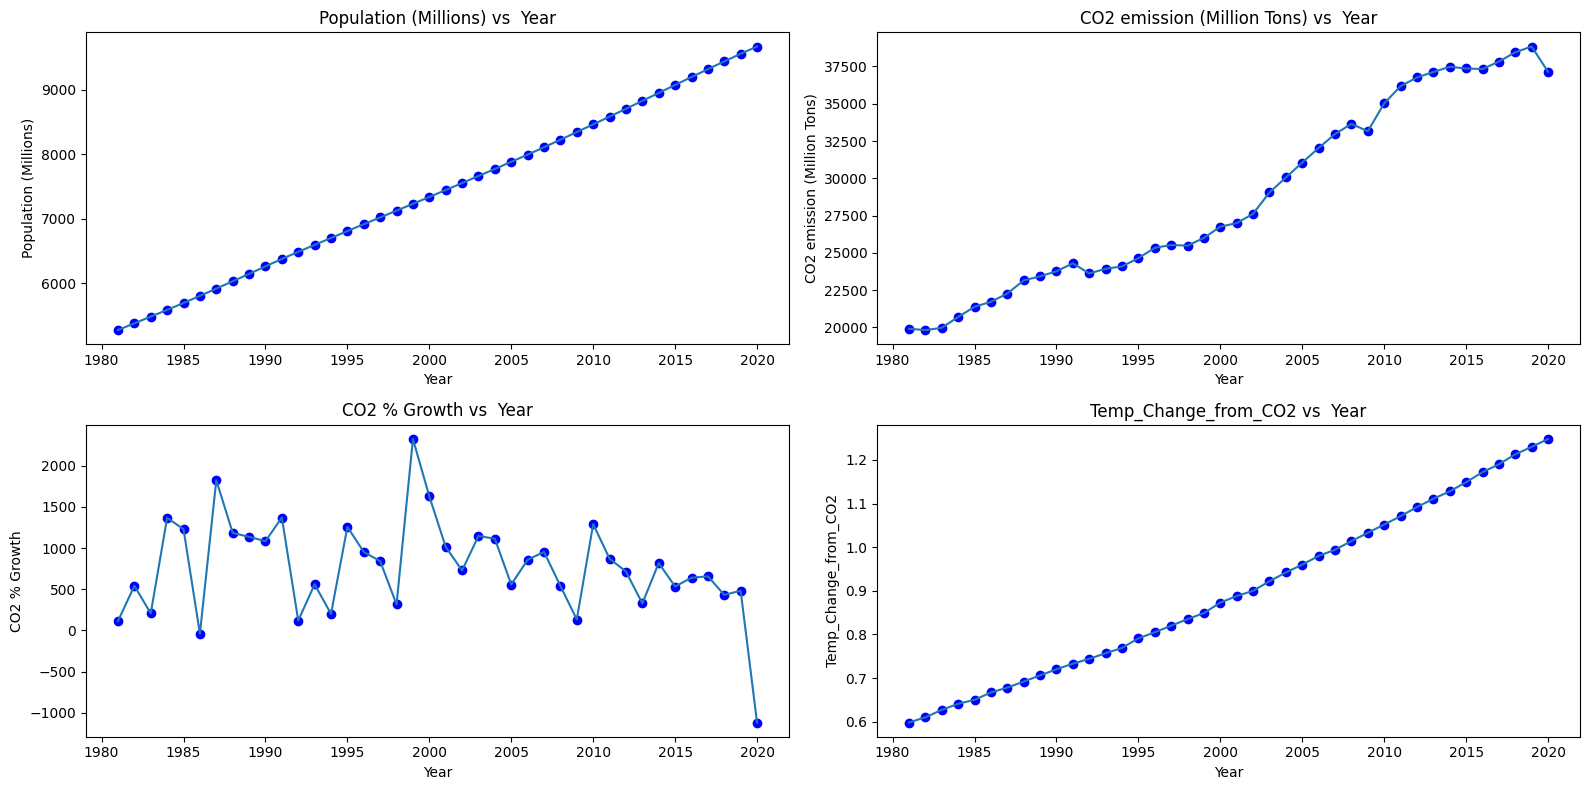

In [50]:
#import the seaborn library
import seaborn as sns
#Create a grid with 2 x 2 Grid for subplots and figure size 16 x 8
fig, ax = plt.subplots(2,2,figsize=(16,8))
#create scatter plot
ax[0,0].scatter(annualCo2Data['Year'], annualCo2Data['Population (Millions)'], color='blue')
#create line plot
sns.lineplot(data = annualCo2Data, x="Year", y="Population (Millions)", ax=ax[0,0])
#add title
ax[0,0].set_title("Population (Millions) vs  Year")

#create scatter plot
ax[0,1].scatter(annualCo2Data['Year'], annualCo2Data['CO2 emission (Million Tons)'], color='blue')
#create line plot
sns.lineplot(data = annualCo2Data, x="Year", y="CO2 emission (Million Tons)", ax=ax[0,1])
#add title
ax[0,1].set_title("CO2 emission (Million Tons) vs  Year")

#create scatter plot
ax[1,0].scatter(annualCo2Data['Year'], annualCo2Data['CO2 % Growth'], color='blue')
#create line plot
sns.lineplot(data = annualCo2Data, x="Year", y="CO2 % Growth", ax=ax[1,0])
#add title
ax[1,0].set_title("CO2 % Growth vs  Year")

#create scatter plot
ax[1,1].scatter(annualCo2Data['Year'], annualCo2Data['Temp_Change_from_CO2'], color='blue')
#create line plot
sns.lineplot(data = annualCo2Data, x="Year", y="Temp_Change_from_CO2", ax=ax[1,1])
#add title
ax[1,1].set_title("Temp_Change_from_CO2 vs  Year")
#show the figure
plt.show()

<div class="alert alert-block alert-info">
Now we will plot a stem plot to demostrate how co2 emission is related to temp change. This will be done by using two columns CO2 % Growth and Temp_Change_from_CO2.
</div>

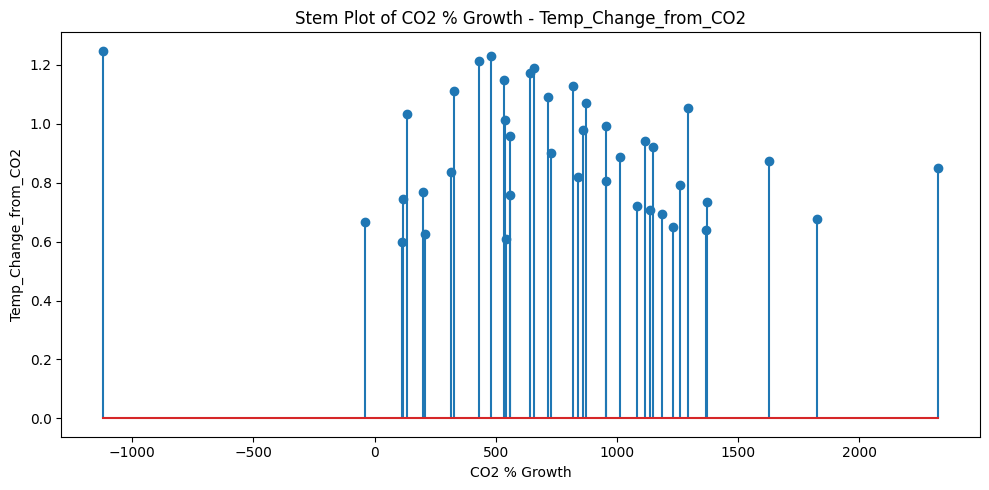

In [51]:
#Create a grid with 1 x 1 Grid for subplots and figure size 10 x 5
fig, ax = plt.subplots(figsize=(10,5))

#create stem plot between CO2 % Growth and Temp_Change_from_CO2
ax.stem(annualCo2Data['CO2 % Growth'], annualCo2Data['Temp_Change_from_CO2'])
#set the title
ax.set_title('Stem Plot of CO2 % Growth - Temp_Change_from_CO2')  
#set the label on y axis
ax.set_ylabel('Temp_Change_from_CO2')  
#set the label on x axis
ax.set_xlabel('CO2 % Growth')    

#show the figure
plt.show()

<div class="alert alert-block alert-success">
    We are done with data visualization
</div>

### Regression Model and Cross-Validation

<div class="alert alert-block alert-info">
In this section we'll be doing the machine learning. For that we'll be apply linear regression model to our annualCo2Dataset. We'll also split the dataset to be used for training and testing and we will be applying cross validation. Our task is to use population and co2 emission for linear regression
</div>

<div class="alert alert-block alert-info">
First we will out random sample of data set we will be using. And then a scatter plot of the selected column will be shown
</div>

In [52]:
#Storing the annualCo2Data dataframe in the mlDataset variable
mlDataset = annualCo2Data

#Get overview of data by checking random 5 variables
mlDataset.tail(5)

,Year,Population (Millions),CO2 emission (Million Tons),CO2 % Growth,Temp_Change_from_CO2
35,2016,9196.794,37320.406,640.299,1.172
36,2017,9318.983,37826.200,657.517,1.190
37,2018,9439.376,38445.347,431.683,1.213
38,2019,9557.278,38833.616,482.321,1.230
39,2020,9670.107,37135.425,-1119.735,1.248


<div class="alert alert-block alert-info">
Now we will select two variables for macine learning and display a scatter plot of it
</div>

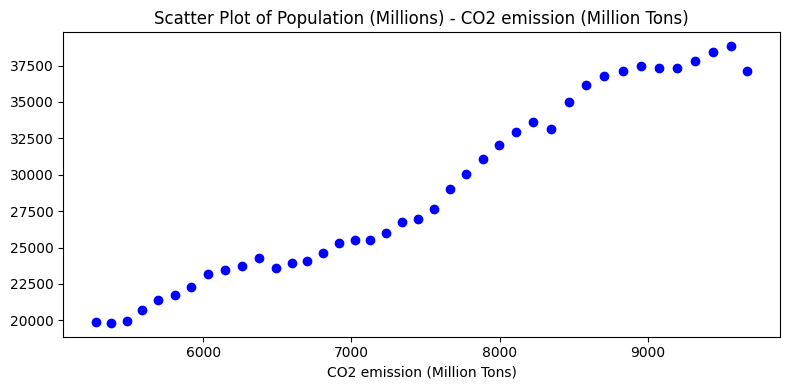

In [53]:
#Create the scatter plot
plt.figure(figsize=(8,4))
plt.scatter(mlDataset['Population (Millions)'],mlDataset['CO2 emission (Million Tons)'], color='blue')
plt.xlabel('Population (Millions)')
plt.xlabel('CO2 emission (Million Tons)')
plt.title('Scatter Plot of Population (Millions) - CO2 emission (Million Tons)')
plt.show()

In [54]:
#installing the scikit library
# !pip install scikit-learn

<div class="alert alert-block alert-info">
    Now we will create a regression model by selecting the feature matrix and the target variable. The data will be 
    splittied to apply linear regression. This will help better evaluate our model for unseen data. Cross validation 
    is applied,  which will also help to know selection bias or over fitting problem. It will also help in evaluating 
    the model. Appropriate metrics will be used to evaluate the performance of the model
</div>

In [55]:
#importing libraries to perform machine learning tasks 
from sklearn.model_selection import train_test_split, cross_val_score, LeaveOneOut
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#this code is written by me

#creating the features matrix
X = mlDataset[['Population (Millions)']]
#setting the target variable 
y = mlDataset['CO2 emission (Million Tons)']

#splitting the training and testing data, also specifying a shuffling of data before splitting
#by setting random state greater than 0
xTraining, xTesting, yTraining, yTesting = train_test_split(X, y, random_state=7, test_size=0.25)

#Getting shapes of my training and testing fatures matrix and target varaible
print(xTraining.shape, yTraining.shape)
print(xTesting.shape, yTesting.shape)

#code i have written ends here

(30, 1) (30,)
(10, 1) (10,)


In [56]:
#this code is written by me

#initializing the regression model and also setting to caculate y intercept
regressionModel = LinearRegression(fit_intercept=True)

#fitting the model by giving training data
regressionModel.fit(xTraining,yTraining)

#printing coefficient of the model
print(regressionModel.coef_)

#printing intercept of the model
print(regressionModel.intercept_)

#code i have written ends here

[4.71858324]
-6221.190413325141


<div class="alert alert-block alert-info">
    Cross-Validation is being done now
</div>

In [57]:
#this code is written by me

#spliting the dataset 5 times differently and getting cross validation score for each
cross_val_scores = cross_val_score(regressionModel, X, y, cv=5)
# Print the cross-validation scores
print("Cross-validation scores:", cross_val_scores)
#calculate the mean of crossvalidation scores
crossValMeanScore = np.mean(cross_val_scores)
print("Mean cross-validation score:", crossValMeanScore)

#code i have written ends here

Cross-validation scores: [-1.60550815 -1.89775494 -0.52115542  0.32138422 -2.97023064]
Mean cross-validation score: -1.3346529862968288


In [58]:
#this code is written by me
#predicting the predcted output by giving the testing features matrix
yPrediction = regressionModel.predict(xTesting)
#code i have written ends here

<div class="alert alert-block alert-info">
    Appropriate metrics will be used to evaluate the model performance.
</div>

In [59]:
#Evalutating the mdoel using different matrix
mae = mean_absolute_error(yTesting, yPrediction)
mse = mean_squared_error(yTesting, yPrediction)
rmse = np.sqrt(mse)
r2 = r2_score(yTesting, yPrediction)

#printing the matrix values
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)

Mean Absolute Error (MAE): 877.2682504053707
Mean Squared Error (MSE): 1228756.3405794695
Root Mean Squared Error (RMSE): 1108.492823873691
R-squared (R2) Score: 0.9761357721833331


<div class="alert alert-block alert-info">
Mean absolute error is 877.268 which is kinda low considereing the values in the columns we have chose so it indicated the model is fine.
Mean Squared error 122875.3405794695 seems fine (could be better) because of the facts the columns we have chose have big values in e.g in thousands so mse can be considered acceptable
Root Means Squared Error is around 1108 which depends on context if it is good or not. Since we can see our other results and visualization is it can be considered good in our case.
if R-Squared equals 0 it means model is performing badly and as it near 1 it indicates it's a good model.. Our value of R-Squared is 0.97 which near 1 that shows the model is good for unseen data.
</div>

<div class="alert alert-block alert-info">
    Below is the visualization that demostrates our model
</div>

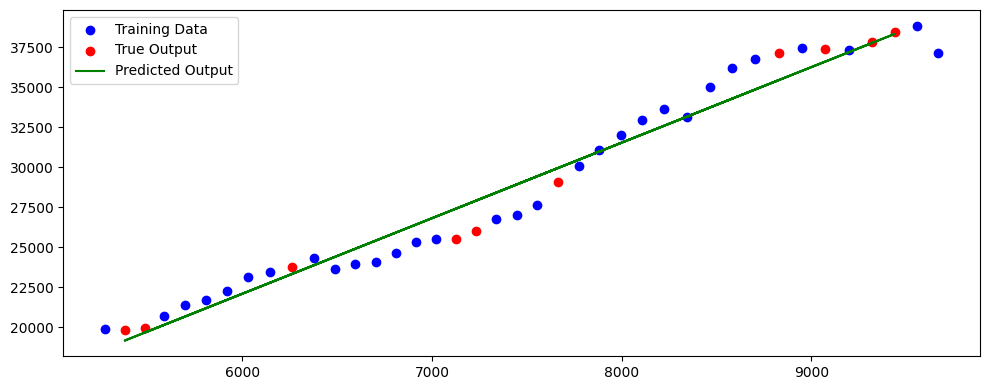

In [60]:
#this code is written by me
#add the figure and set its size
plt.figure(figsize=(10,4))
#add scatter for and training output based on training input
plt.scatter(xTraining, yTraining, color='blue')
#add scatter for and true ouput based on testing input
plt.scatter(xTesting, yTesting, color='red')
#add line for and predicted ouput based on testing input
plt.plot(xTesting,yPrediction, color='green')
#add legend
plt.legend(['Training Data', 'True Output', 'Predicted Output'])
#show the figure
plt.show()
#code i have written ends here

<div class="alert alert-block alert-info">
    Visualization below compares the true versus predicted values
</div>

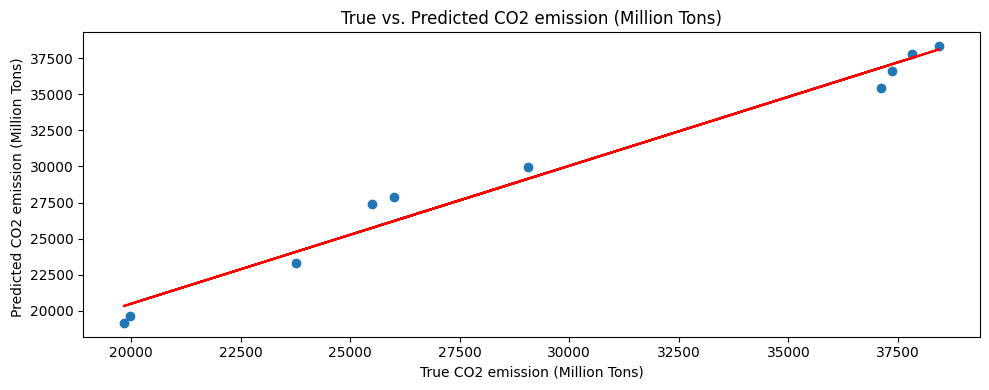

In [61]:
 #this code is written by me
plt.figure(figsize=(10,4))
plt.scatter(yTesting, yPrediction)
plt.xlabel('True CO2 emission (Million Tons)')
plt.ylabel('Predicted CO2 emission (Million Tons) ')
plt.title('True vs. Predicted CO2 emission (Million Tons)')

#the code i have written ends here

#adding the regression line
plt.plot(yTesting, np.polyval(np.polyfit(yTesting, yPrediction, 1), yTesting), color='red', lw=1.5) 

plt.show()

<div class="alert alert-block alert-success">
   Now we are done with regression and cross validation 
</div>

### Feature Engineering

<div class="alert alert-block alert-success">
Firstly we need to to check if it regression model can be be improved for that we will do recursive feature elimination.
</div>

In [62]:
#libraries to be used in feature engineering
from sklearn.feature_selection import RFE

# Selecting features matrix
X = mlDataset[['Temp_Change_from_CO2', 'Population (Millions)', 'CO2 % Growth']]
# Selecting the targetted variable
y = mlDataset['CO2 emission (Million Tons)']


# recursive feature elimination technique used to rank and select best features
rfe = RFE(regressionModel, step=1, n_features_to_select=1) 

#fitting the model
rfe.fit(X, y)

#finding the ranking of the features
rankFeatures = rfe.ranking_

#printing the length of ranking
print(rankFeatures)

[1 2 3]


<div class="alert alert-block alert-success">
    So the ranking suggests that features 'Temp_Change_from_CO2', 'Population (Millions)', 'CO2 % Growth' get the 
    ranking 1, 2, 3 respectively. The number one ranked Temp_Change_from_Co2 will not be used because these two  
    Population (Millions), CO2 % Growth are more suitable for our specific domain. As a result we will see the next 
    best in ranking which is Population (Millions). So this suggests we do not need to change the selected feature as 
    the one already selected is good.
</div>

<div class="alert alert-block alert-info">
    We will now apply a data bining technique to create a new column and based on the co2 emission this will 
    have 3 categories toxic, average bad. A record will be cetegroies based on its co2 emission
</div>

In [63]:
#this code is written by me
#perform data binning on points variable
mlDataset['CO2 Emission Rank'] = pd.qcut(mlDataset['CO2 emission (Million Tons)'], 
                                                       q=[0, 0.3, 0.6,1],
                                                       labels=['Good', 'Average', 'Toxic'])



#view updated DataFrame
print(mlDataset.sample(5))

#code i have written ends here

    Year  Population (Millions)  CO2 emission (Million Tons)  CO2 % Growth   
6   1987               5919.624                    22275.892      1825.211  \
20  2001               7446.765                    26996.491      1014.903   
22  2003               7663.912                    29051.609      1147.969   
28  2009               8344.940                    33153.488       132.611   
3   1984               5589.778                    20703.804      1368.498   

    Temp_Change_from_CO2 CO2 Emission Rank  
6                  0.678              Good  
20                 0.888           Average  
22                 0.922           Average  
28                 1.033             Toxic  
3                  0.641              Good  


In [64]:
#this code is written by me
#Get the value countsz
mlDataset['CO2 Emission Rank'].value_counts()
#code i have written ends here

CO2 Emission Rank
Toxic      16
Good       12
Average    12
Name: count, dtype: int64

#### Conclusions:</br>

#### Data Pre-Processing: </br>
Data pre-processing was done on the initial Dataset. The required columns were selected, null values were removed and 
appropriate column names were selected. In the end two datasets were created, one with each country's co2 emission, population, co2 % growth and temperature change from co2 per year. Another dataset was created by summing up all these fields for every country in a year.

#### Statistical Analysis: </br>
Statistical analysis was done on both the datasets to find the measures of central tendency, measures of spread, and the type of distribution.

#### Data Visualization:</br>
Through visualizations we were able to find out countries that most contributed towards co2 emission over the last 40 years.We were also able to visualize the relationship between temperature change and co2 % growth through a stem plot. We also visualized certain features over the last 40 years

#### Linear Regression with Cross-Validation: </br>
For the machine learning part linear regression and cross-validation was applied to the 2nd dataset that is the annualCo2Data. The feature chosen was Population (Millions) and the target variable being CO2 emission (Million Tons). Other techniques applied involved cross Validation, separating training and testing data, visualizing the predicted and true outputs and also appropriate measures were applied to evaluate the regression model and through this it was concluded that i was a good model even for unseen data.

#### Feature Engineering: </br>
Recursive Feature Elimination was applied to check if the model could be improved by selecting the best feature. Three features were given to be ranked. The 2nd ranked feature was kept due to the fact it best contributed towards our specific domain. Data bining technique was applied to create a separate column that categorized the co2 emission

#### Final Remarks:</br>
Through the project we were able to find out which countries were mostly responsible for co2 emission. This information can be used by these countries to apply policies to reduce it. We checked the relationship between co2 % growth and temp change and as a result we further found out how harmful co2 emission is towards the environment. We were also able to find out that population and co2 emission are directly proportional. We realized how the population has increased over the years and as a result co2 emission has increased. These were the discoveries made, now these could be used to control the co2 emission